# Import The Libraries

In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Reading The Data

In [748]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Preparing The Data

In [750]:
df = df.drop('id', axis= 1)
df = df.drop('dataset' , axis = 1)
df = df.rename(columns={'num': 'disease_state'})

In [751]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,disease_state
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            920 non-null    int64  
 1   sex            920 non-null    object 
 2   cp             920 non-null    object 
 3   trestbps       861 non-null    float64
 4   chol           890 non-null    float64
 5   fbs            830 non-null    object 
 6   restecg        918 non-null    object 
 7   thalch         865 non-null    float64
 8   exang          865 non-null    object 
 9   oldpeak        858 non-null    float64
 10  slope          611 non-null    object 
 11  ca             309 non-null    float64
 12  thal           434 non-null    object 
 13  disease_state  920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


# Collecting the Columns according to data type

In [753]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [754]:
print(numeric_columns)
print(categorical_columns)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'disease_state']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


# Prepare The Numerical Data

In [755]:
df['age'] = df['age'].replace(0, np.nan)
df['ca'] = df['ca'].mask(~df['ca'].isin([0, 1, 2, 3]), np.nan)

# Prepare The Categorical Data

In [756]:
df['sex'] = df['sex'].mask(~df['sex'].isin(['Male' , 'Female']), np.nan)
df['cp'] = df['cp'].mask(~df['cp'].isin(['typical angina', 'atypical angina' , 'non-anginal' , 'asymptomatic']), np.nan)
df['restecg'] = df['restecg'].mask(~df['restecg'].isin(['normal', 'stt abnormality', 'lv hypertrophy']), np.nan)
df['slope'] = df['slope'].mask(~df['slope'].isin(['upsloping', 'flat', 'downsloping']), np.nan)
df['thal'] = df['thal'].mask(~df['thal'].isin(['normal', 'fixed defect', 'reversable defect']), np.nan)
df['fbs'] = df['fbs'].mask(~df['fbs'].isin(['True' , 'False']), np.nan)
df['exang'] = df['exang'].mask(~df['exang'].isin(['True' , 'False']), np.nan)

# Check on The NUlls Percentage

In [757]:
for col in df.columns:
  col_data = (df[col].isna().sum()/ len(df)) * 100
  if col_data > 80:
    print(f"The {col} Has Nulls Greater Than {80}% = {col_data}")
    if col in numeric_columns:
      numeric_columns.remove(col)
    elif col in categorical_columns:
      categorical_columns.remove(col)
  else:
    print(f"The {col} Has Nulls = {col_data}%")

The age Has Nulls = 0.0%
The sex Has Nulls = 0.0%
The cp Has Nulls = 0.0%
The trestbps Has Nulls = 6.41304347826087%
The chol Has Nulls = 3.260869565217391%
The fbs Has Nulls Greater Than 80% = 100.0
The restecg Has Nulls = 19.67391304347826%
The thalch Has Nulls = 5.978260869565218%
The exang Has Nulls Greater Than 80% = 100.0
The oldpeak Has Nulls = 6.739130434782608%
The slope Has Nulls = 33.58695652173913%
The ca Has Nulls = 66.41304347826087%
The thal Has Nulls = 52.826086956521735%
The disease_state Has Nulls = 0.0%


# Split The data For Train and Test

In [758]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Handle Missing Values

In [759]:
threshold = 80

# Drop The Columns That Has Nulls Greater Than The Threshold

# For Train Data

In [760]:
for col in train_data.columns:
  col_data = (train_data[col].isna().sum()/ len(train_data)) * 100
  if col_data > threshold:
    print(f"The {col} Has Nulls Greater Than {threshold}% = {col_data}")
    train_data = train_data.drop(col, axis=1)
  else:
    print(f"The {col} Has Nulls = {col_data}%")

The age Has Nulls = 0.0%
The sex Has Nulls = 0.0%
The cp Has Nulls = 0.0%
The trestbps Has Nulls = 6.114130434782608%
The chol Has Nulls = 3.3967391304347823%
The fbs Has Nulls Greater Than 80% = 100.0
The restecg Has Nulls = 19.429347826086957%
The thalch Has Nulls = 5.706521739130435%
The exang Has Nulls Greater Than 80% = 100.0
The oldpeak Has Nulls = 6.114130434782608%
The slope Has Nulls = 32.33695652173913%
The ca Has Nulls = 66.03260869565217%
The thal Has Nulls = 52.9891304347826%
The disease_state Has Nulls = 0.0%


# For Test Data

In [761]:
for col in test_data.columns:
  col_data = (test_data[col].isna().sum()/ len(test_data)) * 100
  if col_data > threshold:
    print(f"The {col} Has Nulls Greater Than {threshold}% = {col_data}")
    test_data = test_data.drop(col, axis=1)
  else:
    print(f"The {col} Has Nulls = {col_data}%")

The age Has Nulls = 0.0%
The sex Has Nulls = 0.0%
The cp Has Nulls = 0.0%
The trestbps Has Nulls = 7.608695652173914%
The chol Has Nulls = 2.717391304347826%
The fbs Has Nulls Greater Than 80% = 100.0
The restecg Has Nulls = 20.652173913043477%
The thalch Has Nulls = 7.065217391304348%
The exang Has Nulls Greater Than 80% = 100.0
The oldpeak Has Nulls = 9.239130434782608%
The slope Has Nulls = 38.58695652173913%
The ca Has Nulls = 67.93478260869566%
The thal Has Nulls = 52.17391304347826%
The disease_state Has Nulls = 0.0%


# Handle Missing Values In Numerical Columns

In [762]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).any()

for col in numeric_columns:
    skewness = train_data[col].skew()
    outliers_present = has_outliers(train_data[col].dropna())
    if abs(skewness) < 0.5 and not outliers_present:
        train_data[col].fillna(train_data[col].mean(), inplace=True)
        print(f"{col} will be filled with mean")
    else:
        train_data[col].fillna(train_data[col].median(), inplace=True)
        print(f"{col} will be filled with median")

age will be filled with mean
trestbps will be filled with median
chol will be filled with median
thalch will be filled with median
oldpeak will be filled with median
ca will be filled with median
disease_state will be filled with median


/tmp/ipython-input-762-1998491897.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mean(), inplace=True)
/tmp/ipython-input-762-1998491897.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [763]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).any()

for col in numeric_columns:
    skewness = test_data[col].skew()
    outliers_present = has_outliers(test_data[col].dropna())
    if abs(skewness) < 0.5 and not outliers_present:
        test_data[col].fillna(train_data[col].mean(), inplace=True)
        print(f"{col} will be filled with mean")
    else:
        test_data[col].fillna(train_data[col].median(), inplace=True)
        print(f"{col} will be filled with median")

age will be filled with mean
trestbps will be filled with median
chol will be filled with median
thalch will be filled with median
oldpeak will be filled with median
ca will be filled with median
disease_state will be filled with median


/tmp/ipython-input-763-2861186741.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(train_data[col].mean(), inplace=True)
/tmp/ipython-input-763-2861186741.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

# Missing Handle Values In Categorical Values

In [764]:
missing_cols = [col for col in categorical_columns if col not in train_data.columns]
if missing_cols:
    print(f"Error: The following columns are not in train_data: {missing_cols}")
else:
    # Impute missing values using the recommended pandas approach
    for col in categorical_columns:
        mode_value = train_data[col].mode()[0]
        train_data[col] = train_data[col].fillna(mode_value)  # Avoid inplace=True
        print(f"{col}: Imputed missing values with mode = {mode_value}")

sex: Imputed missing values with mode = Male
cp: Imputed missing values with mode = asymptomatic
restecg: Imputed missing values with mode = normal
slope: Imputed missing values with mode = flat
thal: Imputed missing values with mode = normal


In [765]:
for col in categorical_columns:
    mode_value = train_data[col].mode()[0]
    test_data[col].fillna(mode_value, inplace=True)
    print(f"{col}: Imputed missing values with mode = {mode_value}")

sex: Imputed missing values with mode = Male
cp: Imputed missing values with mode = asymptomatic
restecg: Imputed missing values with mode = normal
slope: Imputed missing values with mode = flat
thal: Imputed missing values with mode = normal


/tmp/ipython-input-765-1587896599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(mode_value, inplace=True)


# Visualize the Target Column

# For Train Data

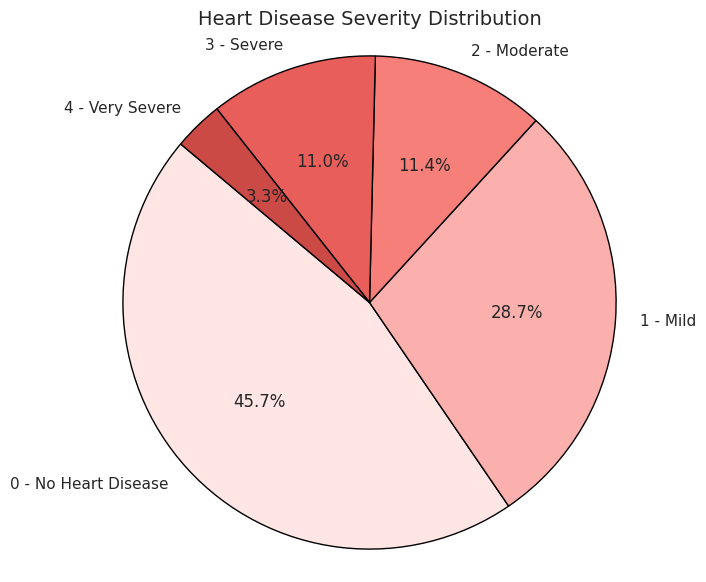

In [766]:
disease_counts = train_data['disease_state'].value_counts().sort_index()
display_labels = [
    '0 - No Heart Disease',
    '1 - Mild',
    '2 - Moderate',
    '3 - Severe',
    '4 - Very Severe'
]
colors = [
    '#ffe6e5',
    '#fbb0ad',
    '#f67f79',
    '#e85e5a',
    '#cc4a45'
]
plt.figure(figsize=(7, 7))
plt.pie(disease_counts, labels=display_labels, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Heart Disease Severity Distribution', fontsize=14)
plt.axis('equal')
plt.show()

# For Test Data

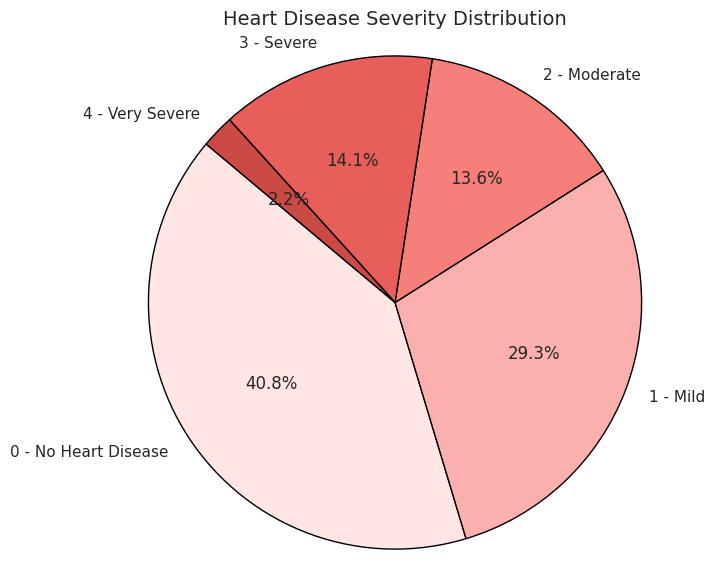

In [767]:
disease_counts = test_data['disease_state'].value_counts().sort_index()
plt.figure(figsize=(7, 7))
plt.pie(disease_counts, labels=display_labels, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Heart Disease Severity Distribution', fontsize=14)
plt.axis('equal')
plt.show()

# Visualize The Categorical Data

# For Train Data

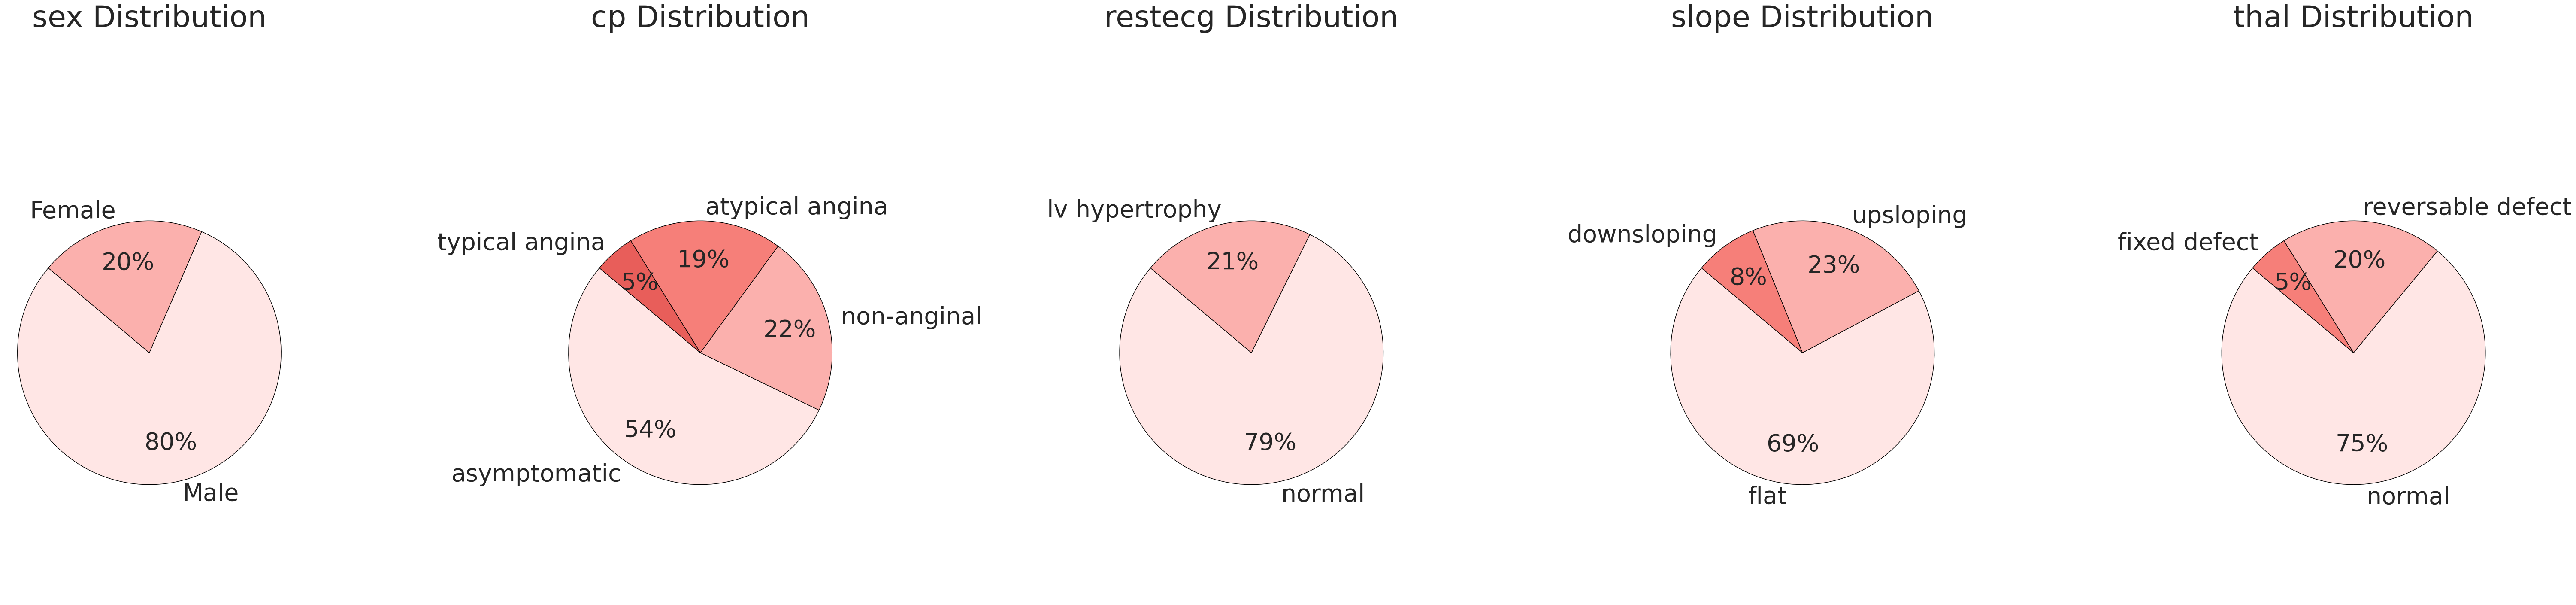

In [768]:
column_to_visualize = categorical_columns.copy()
num_cols = len(column_to_visualize)

fig, axes = plt.subplots(
    1, num_cols,
    figsize=(15 * num_cols, 15),
    gridspec_kw={'wspace': 0.9}
)

for i, col in enumerate(column_to_visualize):
    target_counts = train_data[col].value_counts()
    labels = target_counts.index.astype(str)
    colors = ['#ffe6e5', '#fbb0ad', '#f67f79', '#e85e5a', '#cc4a45'][:len(labels)]

    wedges, texts, autotexts = axes[i].pie(
        target_counts,
        labels=labels,
        autopct='%1.0f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 40},
        labeldistance=1.1,
        pctdistance=0.7
    )

    for text in texts:
        text.set_fontsize(40)
    for autotext in autotexts:
        autotext.set_fontsize(40)

    axes[i].axis('equal')
    axes[i].set_title(f'{col} Distribution', fontsize=50, y=1.15)

plt.show()


# For Test Data

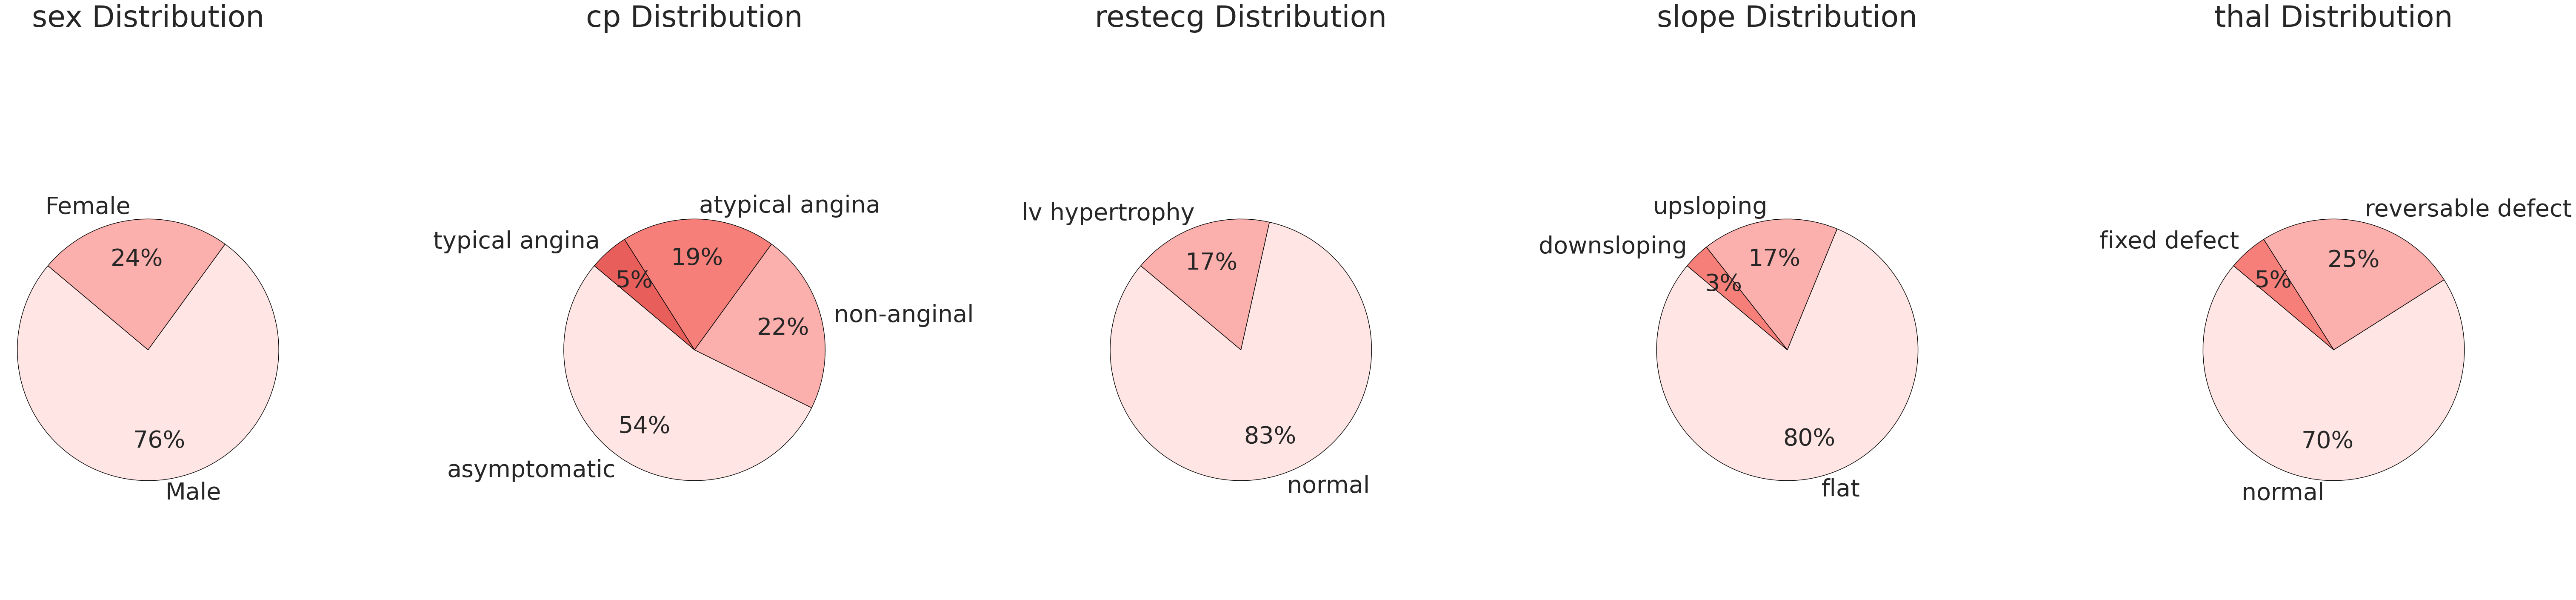

In [769]:
column_to_visualize = categorical_columns.copy()
num_cols = len(column_to_visualize)

fig, axes = plt.subplots(
    1, num_cols,
    figsize=(15 * num_cols, 15),
    gridspec_kw={'wspace': 0.9}
)

for i, col in enumerate(column_to_visualize):
    target_counts = test_data[col].value_counts()
    labels = target_counts.index.astype(str)
    colors = ['#ffe6e5', '#fbb0ad', '#f67f79', '#e85e5a', '#cc4a45'][:len(labels)]

    wedges, texts, autotexts = axes[i].pie(
        target_counts,
        labels=labels,
        autopct='%1.0f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 40},
        labeldistance=1.1,
        pctdistance=0.7
    )

    for text in texts:
        text.set_fontsize(40)
    for autotext in autotexts:
        autotext.set_fontsize(40)

    axes[i].axis('equal')
    axes[i].set_title(f'{col} Distribution', fontsize=50, y=1.15)

plt.show()


# Apply One Hot Encoding For Categorical Data

## Encode Sex Column

In [770]:
train_data['sex'] = train_data['sex'].replace({"Male": 0, "Female": 1})

/tmp/ipython-input-770-2741447929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['sex'] = train_data['sex'].replace({"Male": 0, "Female": 1})


In [771]:
test_data['sex'] = test_data['sex'].replace({"Male": 0, "Female": 1})

/tmp/ipython-input-771-714127253.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['sex'] = test_data['sex'].replace({"Male": 0, "Female": 1})


## Encode CP Column

In [772]:
train_data['cp'] = train_data['cp'].replace({
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
})

/tmp/ipython-input-772-2598855778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['cp'] = train_data['cp'].replace({


In [773]:
test_data['cp'] = test_data['cp'].replace({
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
})

/tmp/ipython-input-773-2688094980.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['cp'] = test_data['cp'].replace({


## Encode Restecg Column

In [774]:
train_data['restecg'] = train_data['restecg'].replace({
    'normal': 0,
    'stt abnormality': 1,
    'lv hypertrophy': 2
})

/tmp/ipython-input-774-2203423173.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['restecg'] = train_data['restecg'].replace({


In [775]:
test_data['restecg'] = test_data['restecg'].replace({
    'normal': 0,
    'stt abnormality': 1,
    'lv hypertrophy': 2
})

/tmp/ipython-input-775-2532244271.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['restecg'] = test_data['restecg'].replace({


## Encode Slope Column

In [776]:
train_data['slope'] = train_data['slope'].replace({
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
})

/tmp/ipython-input-776-2831874571.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['slope'] = train_data['slope'].replace({


In [777]:
test_data['slope'] = test_data['slope'].replace({
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
})

/tmp/ipython-input-777-1784888776.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['slope'] = test_data['slope'].replace({


## Encode Thal Column

In [778]:
train_data['thal'] = train_data['thal'].replace({
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2
})

/tmp/ipython-input-778-1110149725.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['thal'] = train_data['thal'].replace({


In [779]:
test_data['thal'] = test_data['thal'].replace({
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2
})

/tmp/ipython-input-779-3749034069.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['thal'] = test_data['thal'].replace({


# Apply MinMaxScaler on Numerical data

In [780]:
scaler = StandardScaler()
for col in numeric_columns:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.transform(test_data[[col]])

In [781]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 880 to 102
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            736 non-null    float64
 1   sex            736 non-null    int64  
 2   cp             736 non-null    int64  
 3   trestbps       736 non-null    float64
 4   chol           736 non-null    float64
 5   restecg        736 non-null    int64  
 6   thalch         736 non-null    float64
 7   oldpeak        736 non-null    float64
 8   slope          736 non-null    int64  
 9   ca             736 non-null    float64
 10  thal           736 non-null    int64  
 11  disease_state  736 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 74.8 KB


In [782]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 319 to 732
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            184 non-null    float64
 1   sex            184 non-null    int64  
 2   cp             184 non-null    int64  
 3   trestbps       184 non-null    float64
 4   chol           184 non-null    float64
 5   restecg        184 non-null    int64  
 6   thalch         184 non-null    float64
 7   oldpeak        184 non-null    float64
 8   slope          184 non-null    int64  
 9   ca             184 non-null    float64
 10  thal           184 non-null    int64  
 11  disease_state  184 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 18.7 KB


# Conduct Exploratory Data Analysis (EDA)

In [783]:
sns.set(style='whitegrid', palette='pastel')

# 📊 1. Histograms – Visualize Distributions

## For Train Data

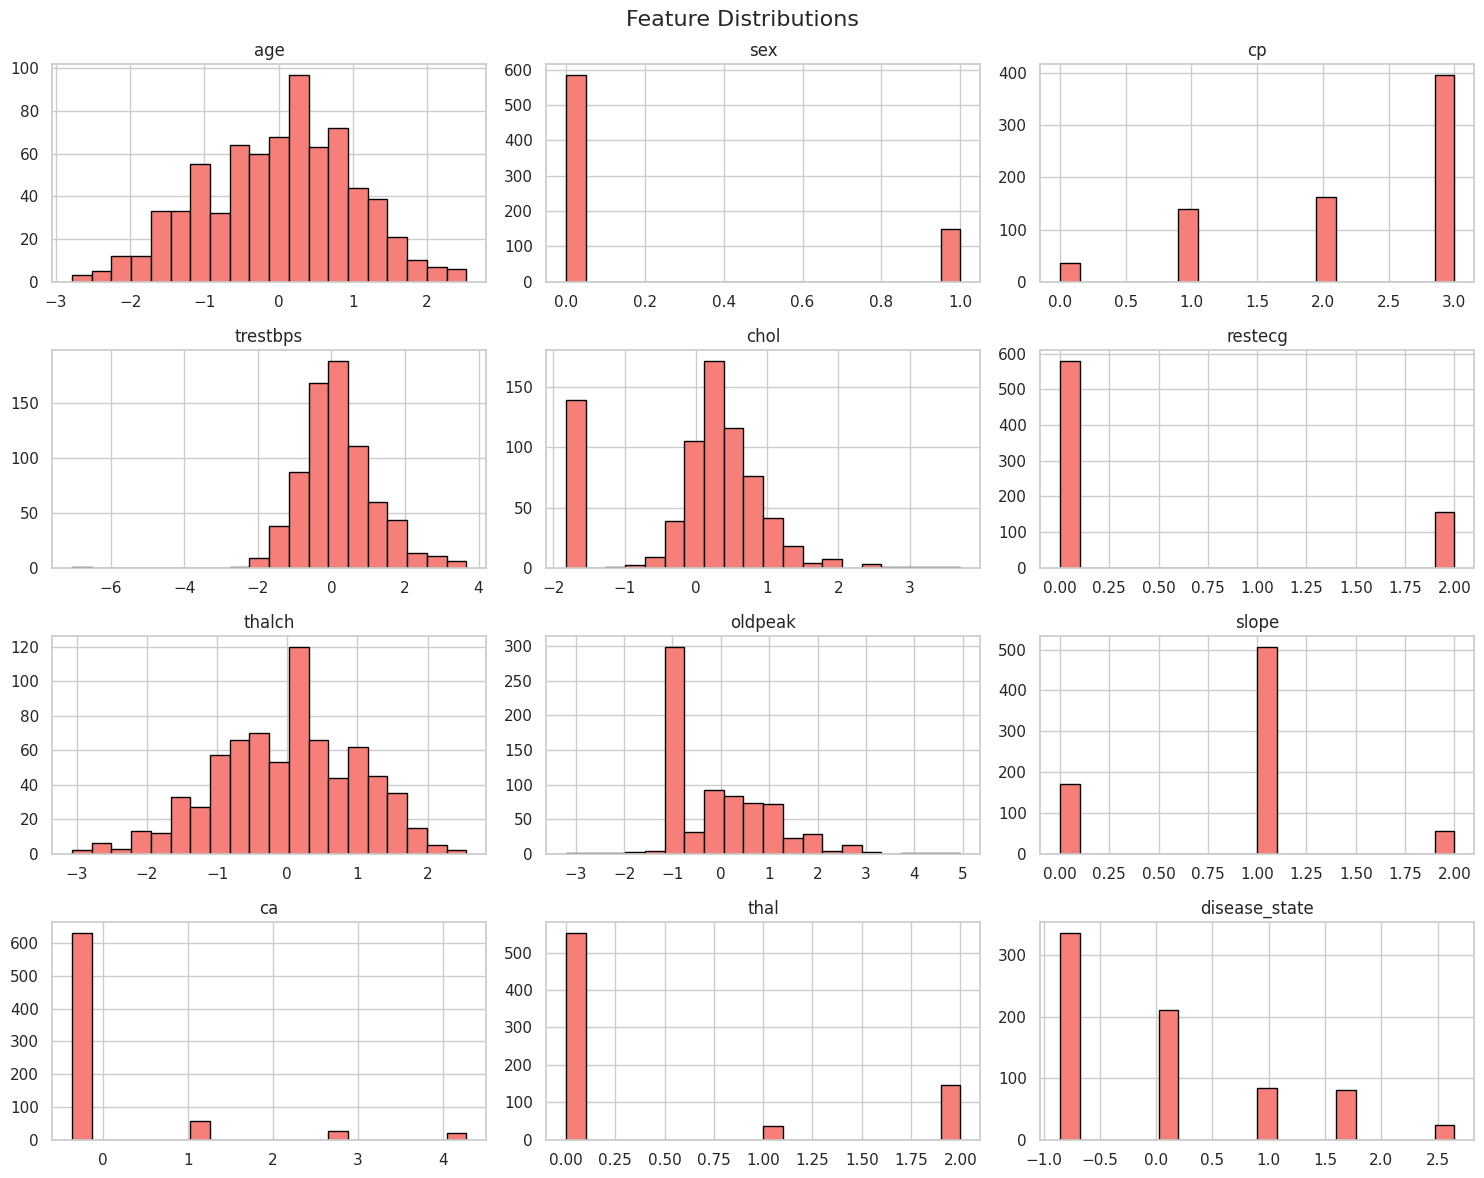

In [784]:
train_data.hist(figsize=(15, 12), bins=20, color='#f67f79', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

## For Test Data

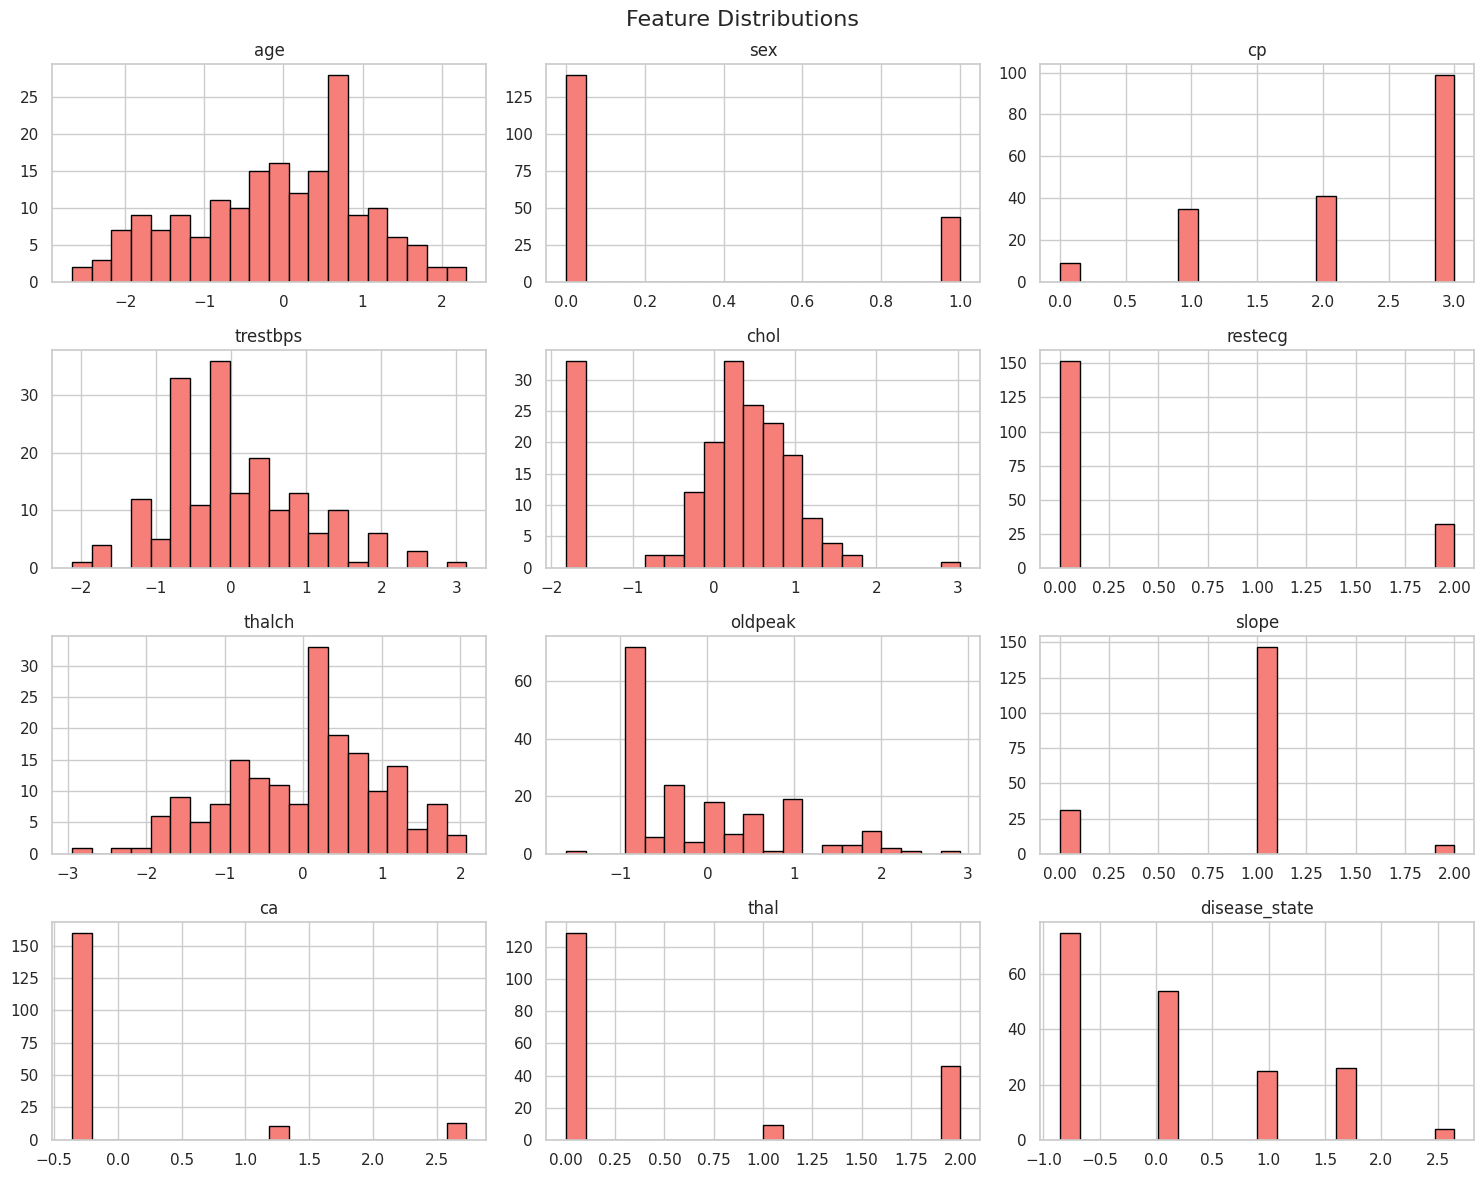

In [785]:
test_data.hist(figsize=(15, 12), bins=20,color = '#f67f79' ,edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap – Feature Relationships

In [786]:
train_disease_state = train_data['disease_state']
train_data = train_data.drop('disease_state' , axis = 1)

In [787]:
test_disease_state = test_data['disease_state']
test_data = test_data.drop('disease_state' , axis = 1)

## For Train Data

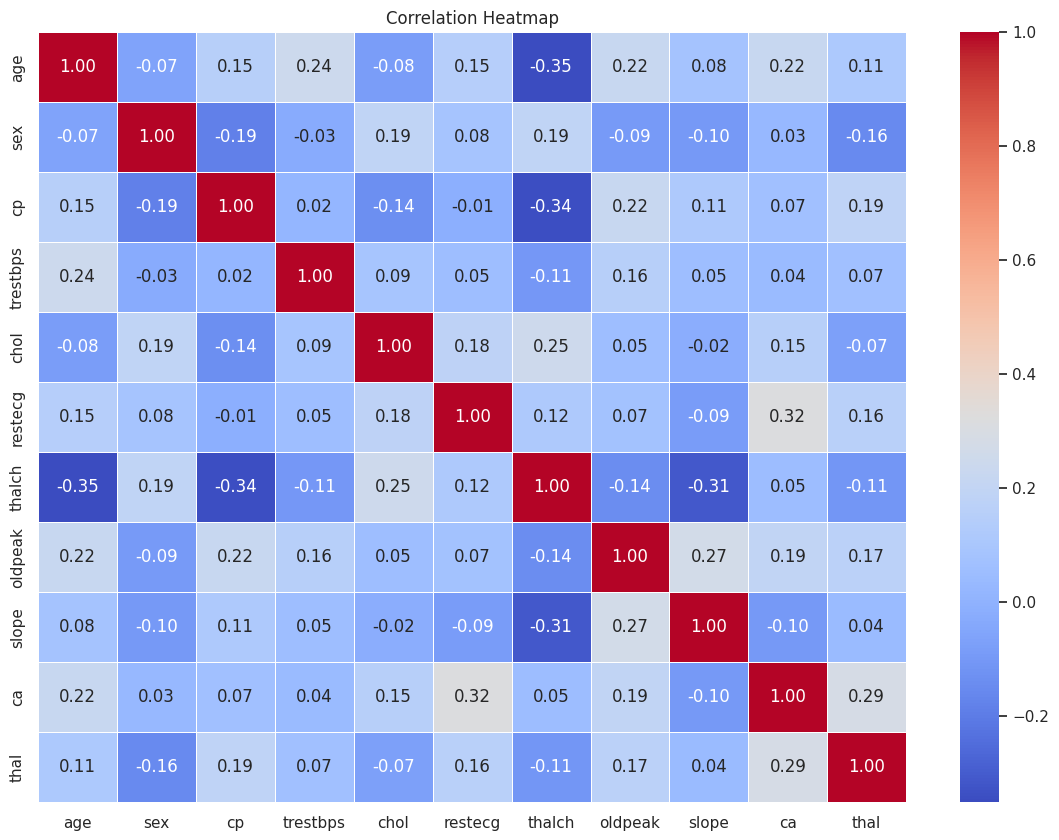

In [788]:
plt.figure(figsize=(14, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## For Test Data

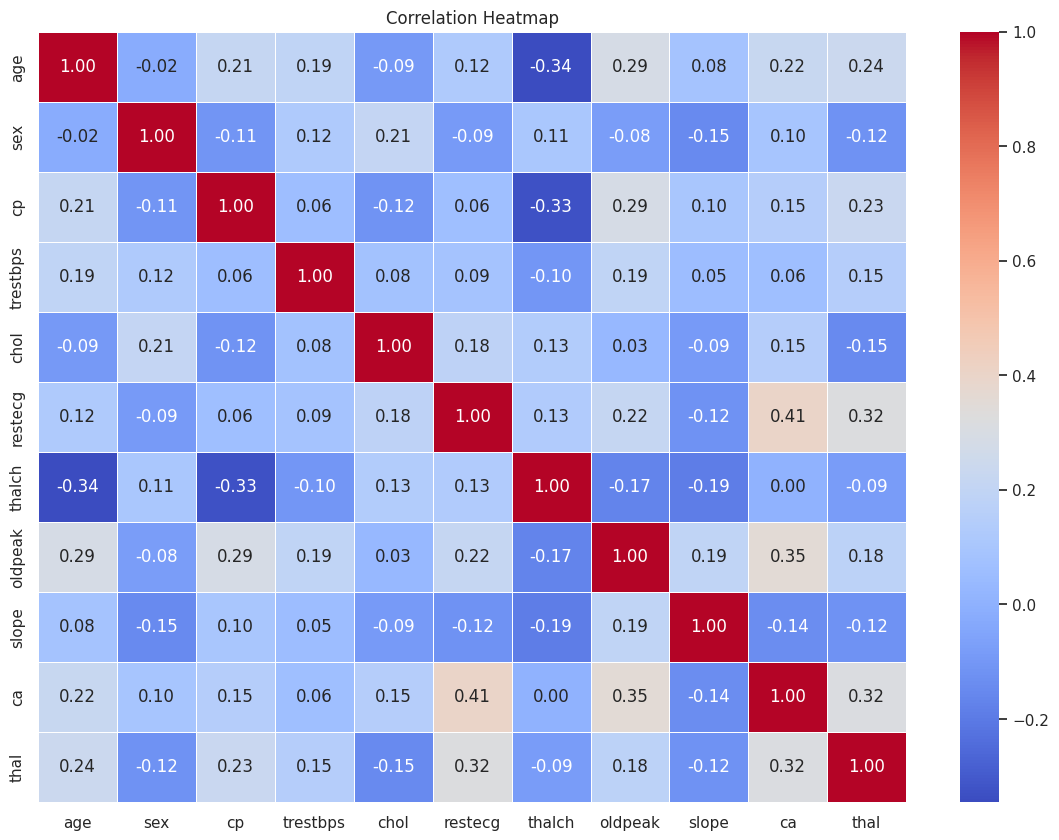

In [789]:
plt.figure(figsize=(14, 10))
correlation_matrix = test_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 📦 3. Boxplots – Detect Outliers & Compare Groups

In [790]:
train_data['disease_state'] = train_disease_state
test_data['disease_state'] = test_disease_state

## For Train Data

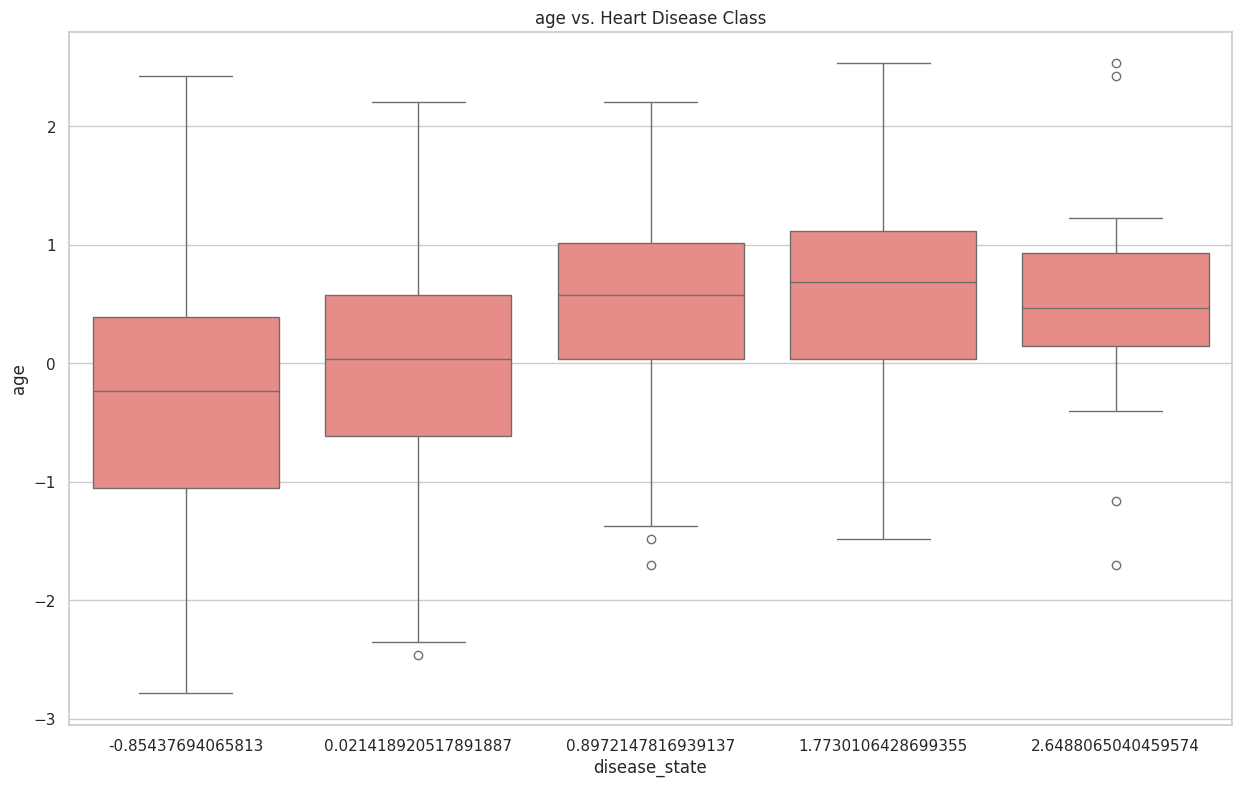

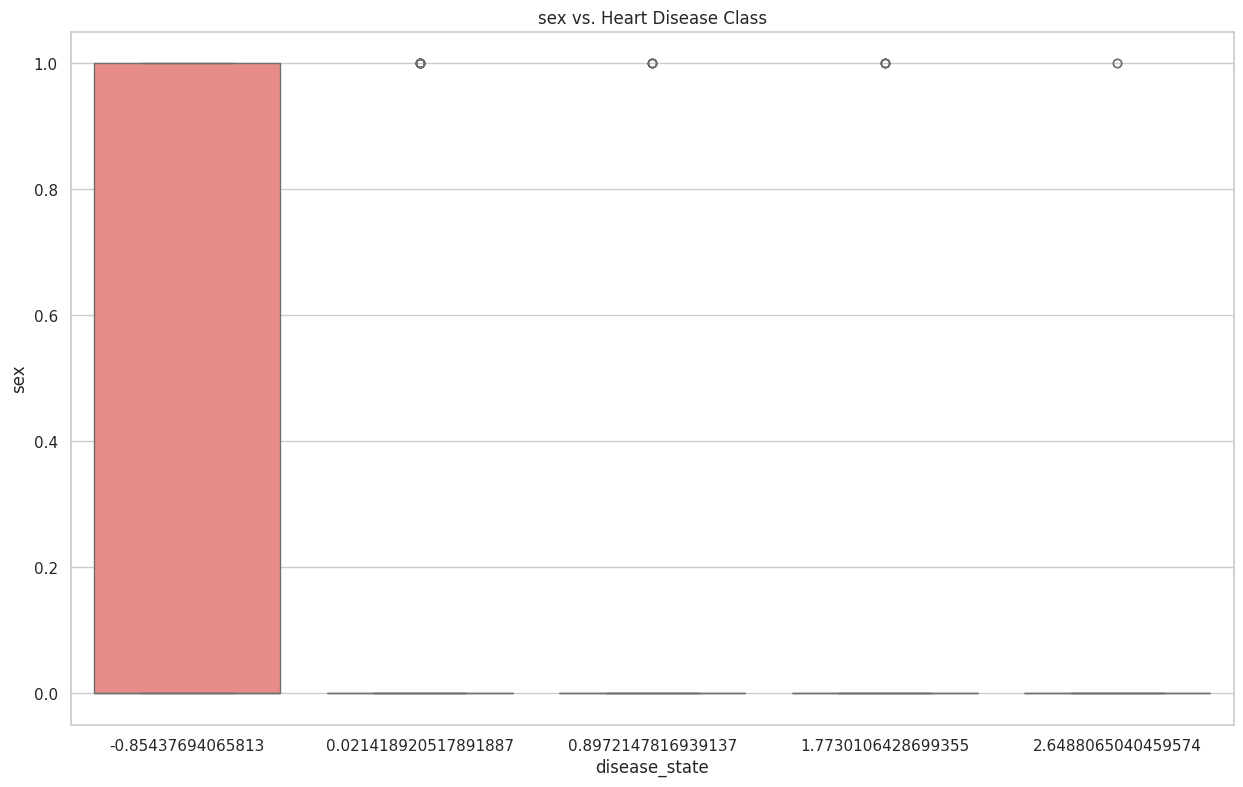

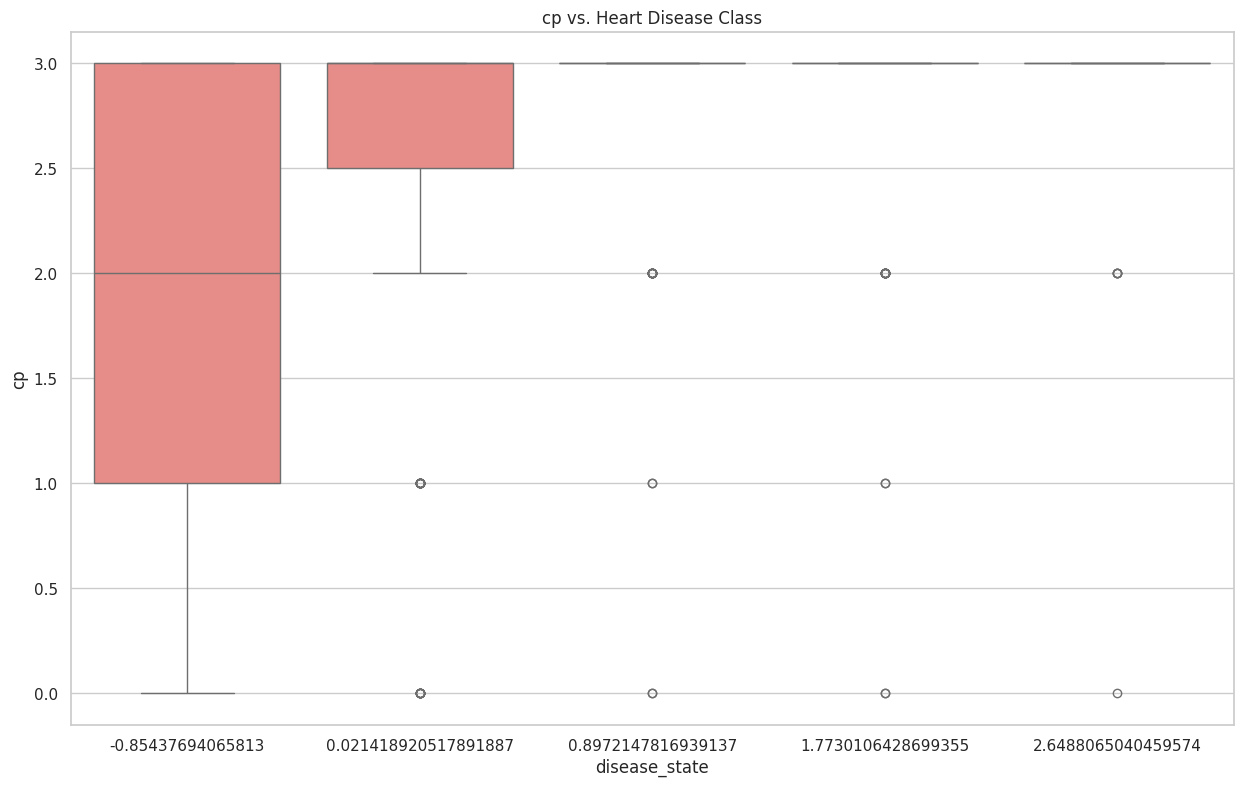

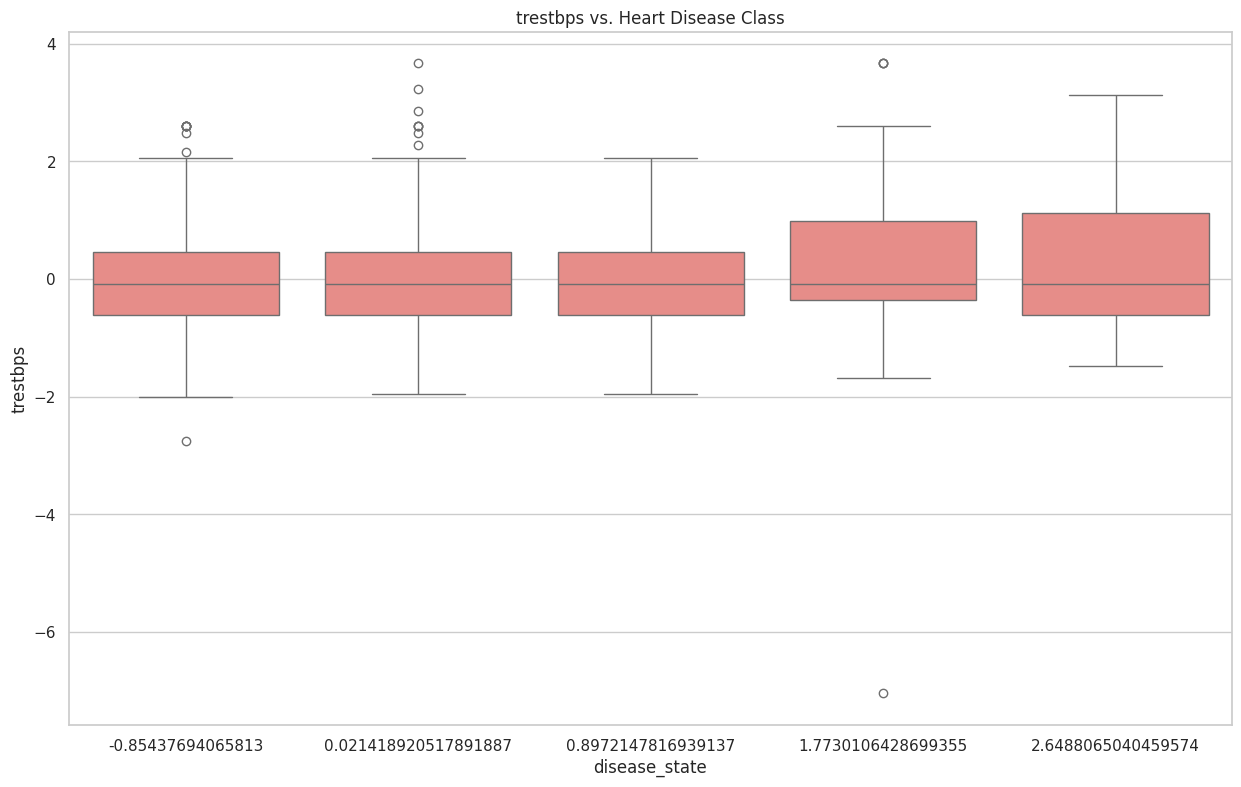

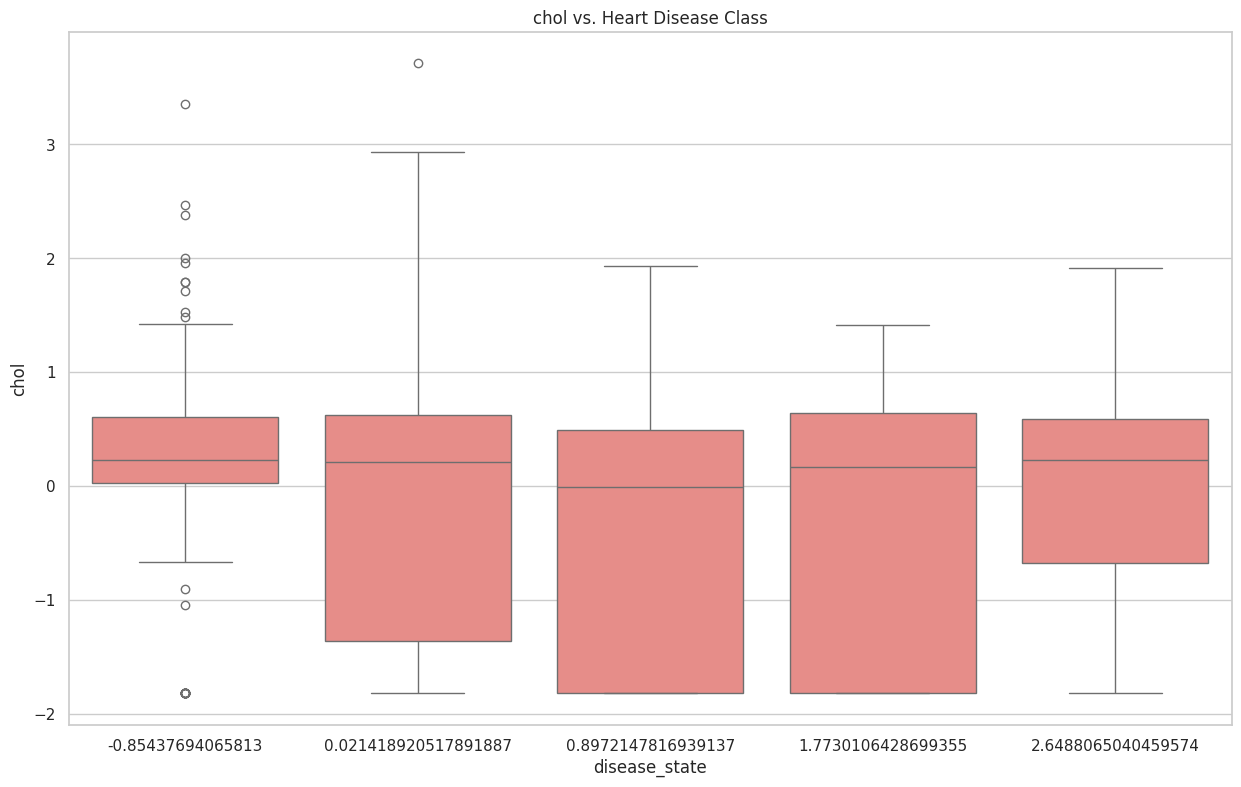

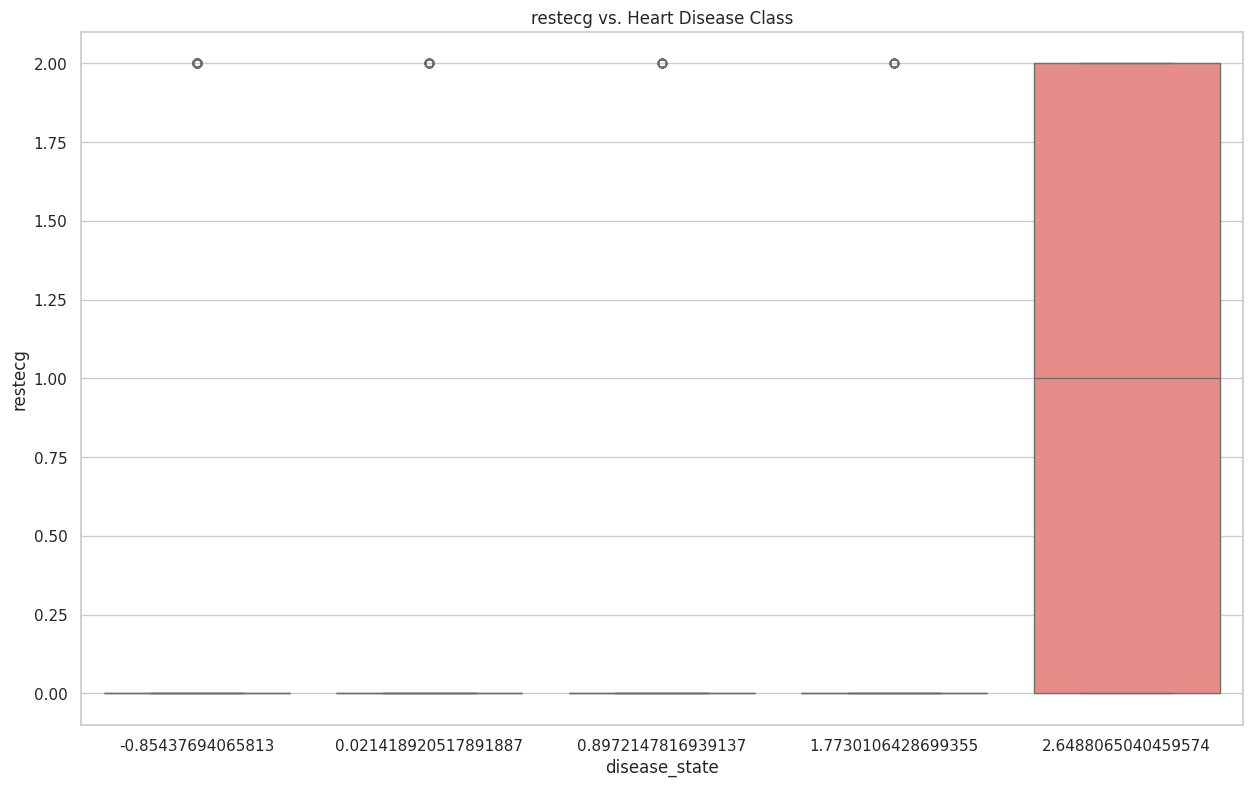

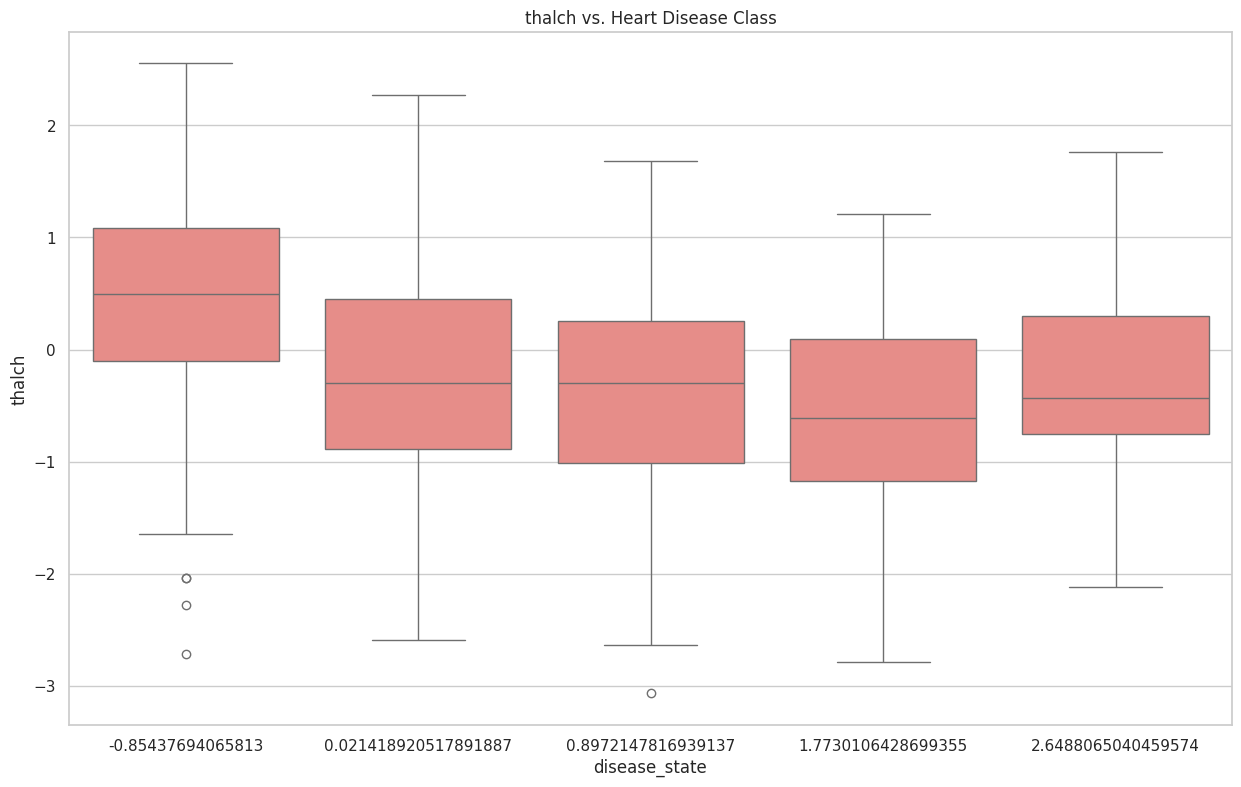

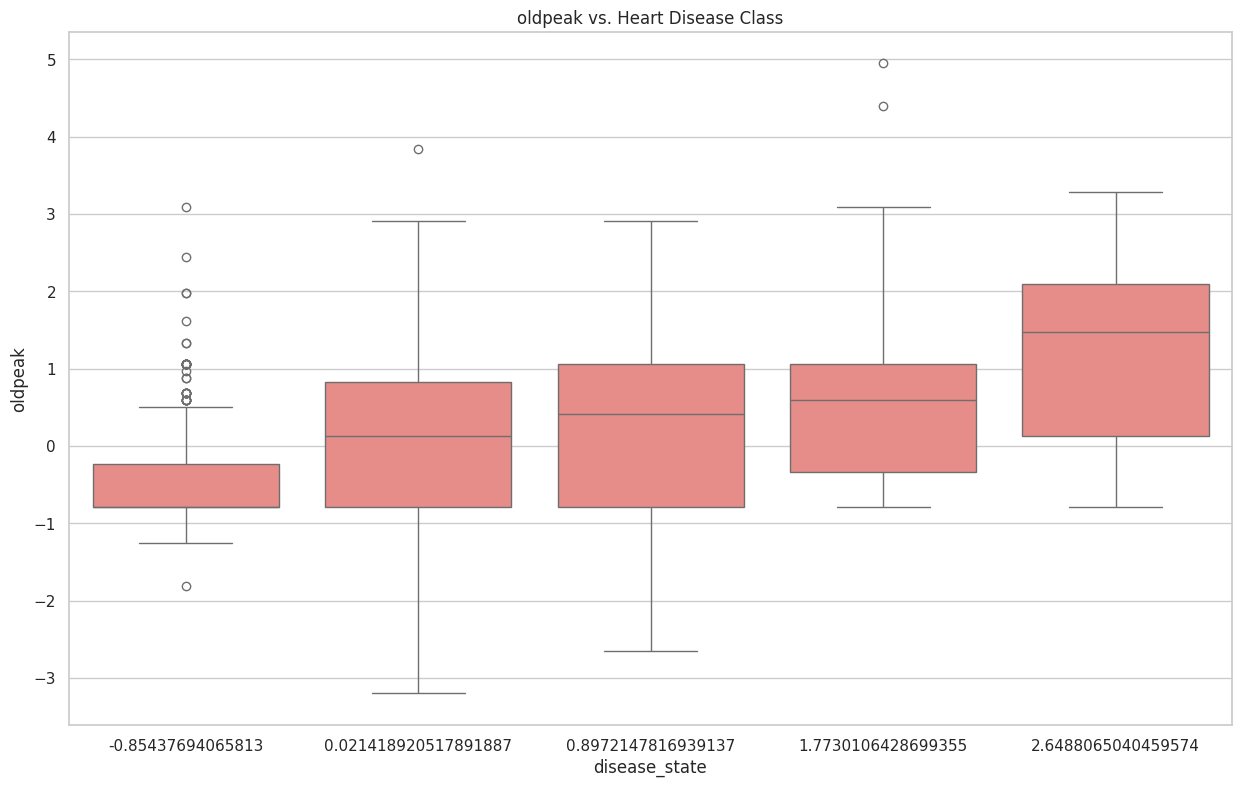

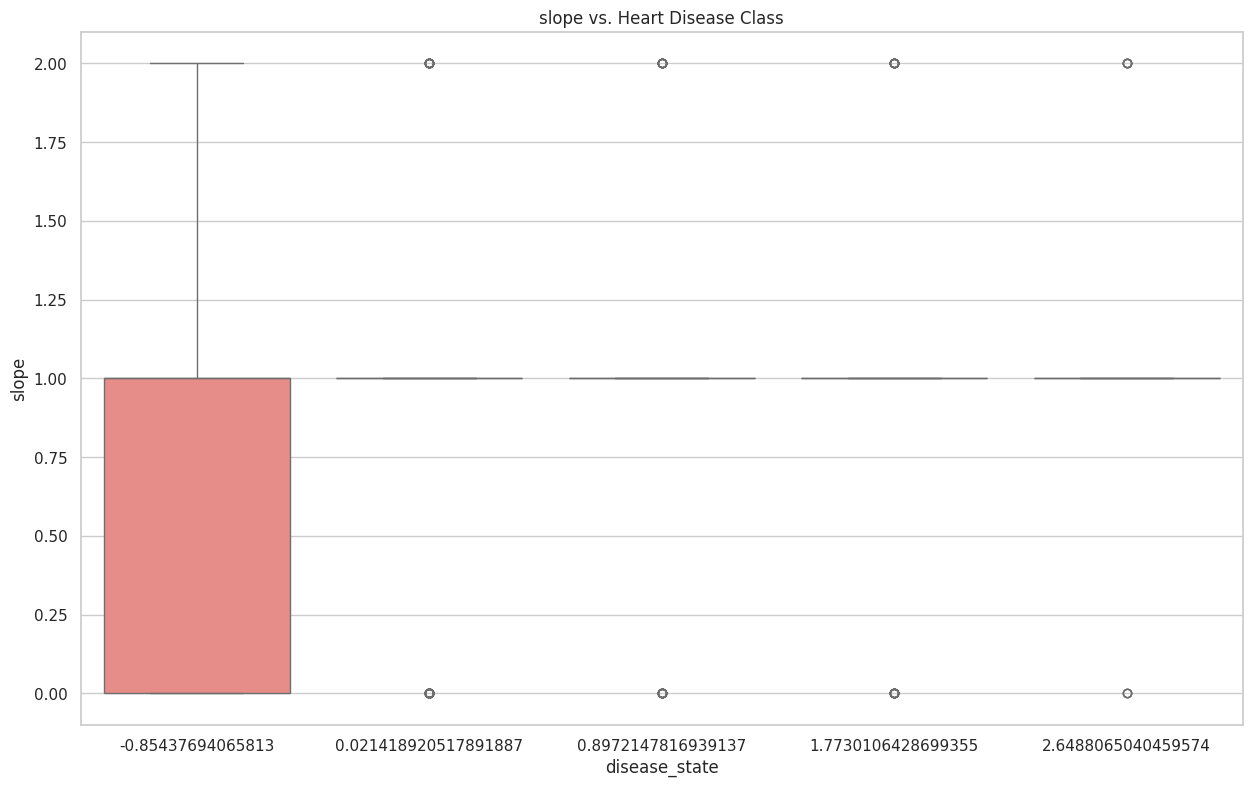

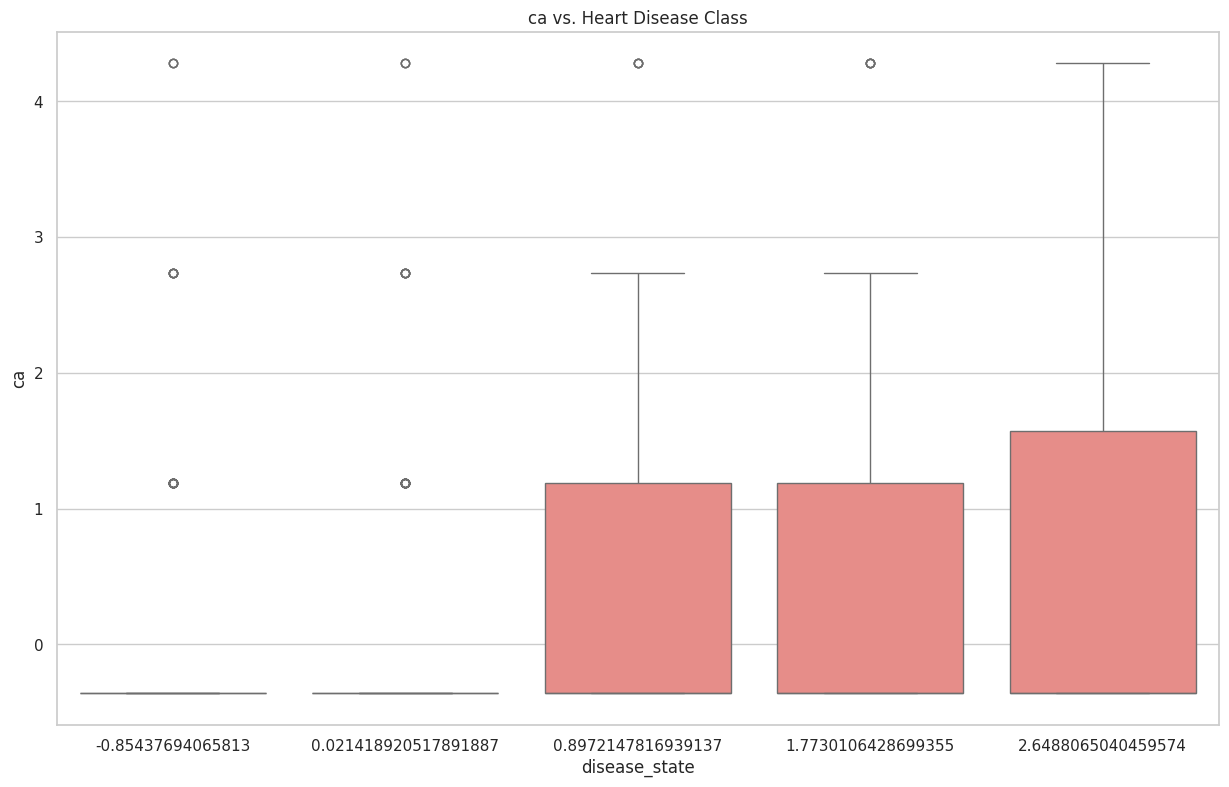

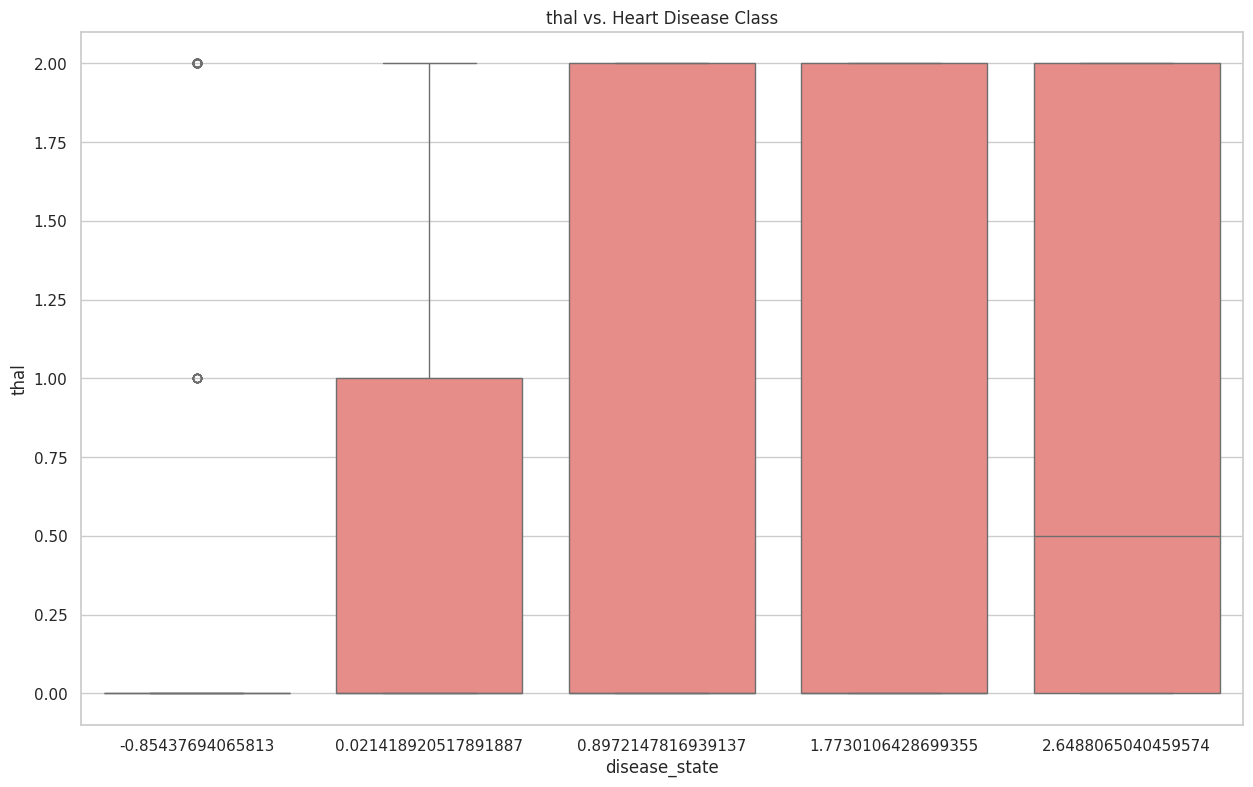

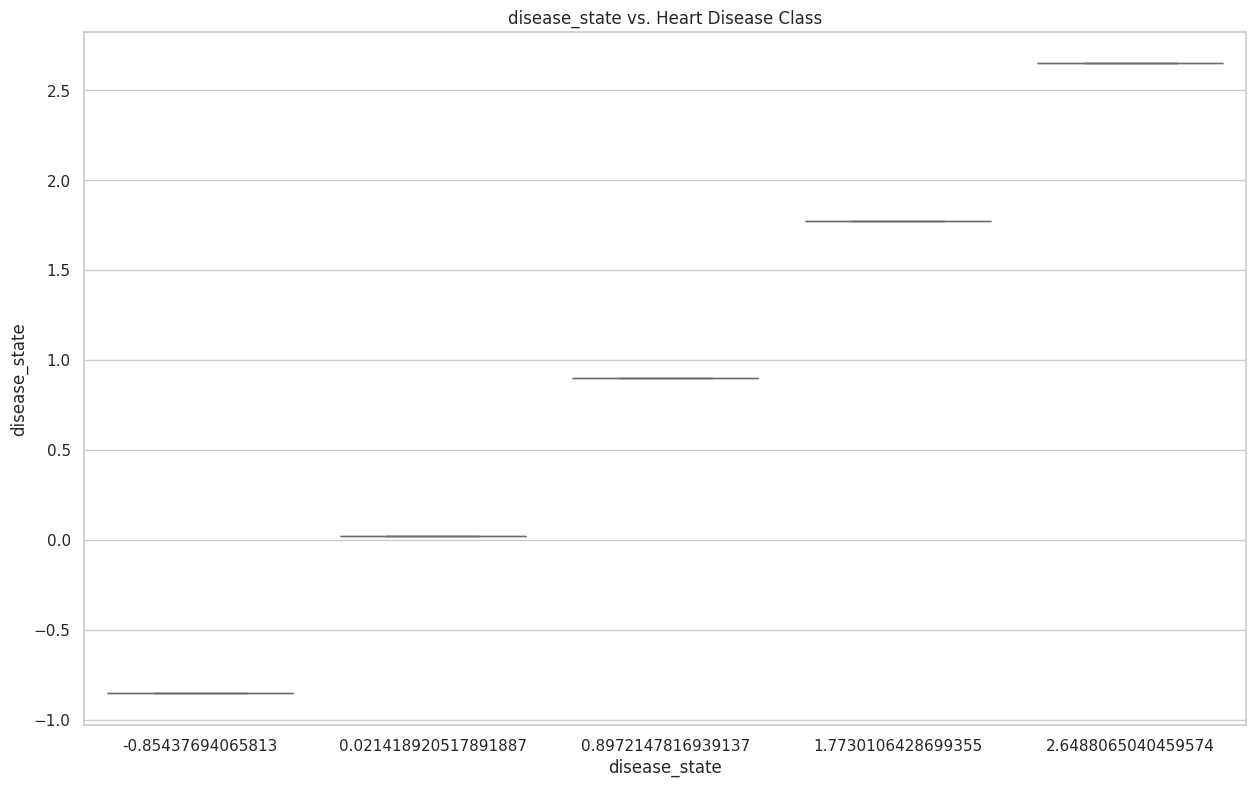

In [791]:
for feature in train_data.columns:
    plt.figure(figsize=(15, 9))
    sns.boxplot(x='disease_state', y = feature, data = train_data , color = '#f67f79')
    plt.title(f"{feature} vs. Heart Disease Class")
    plt.show()

## For Test Data

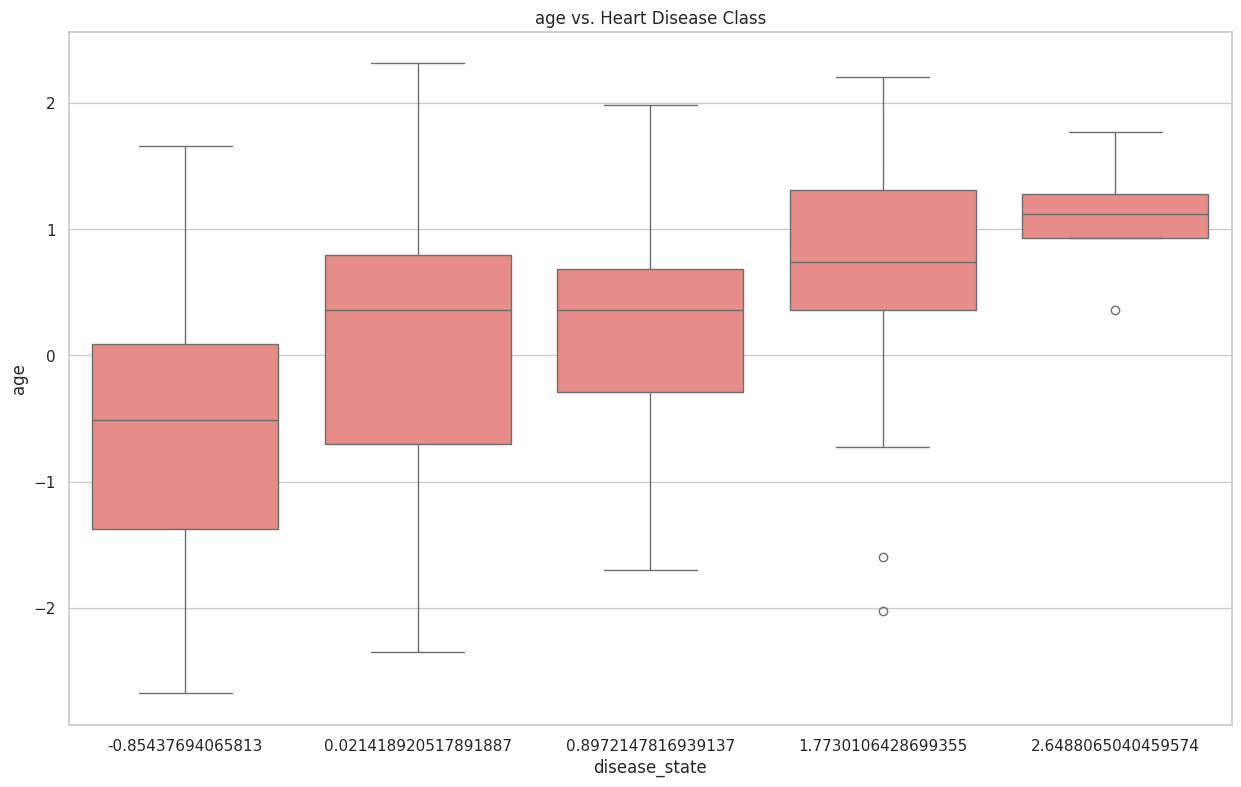

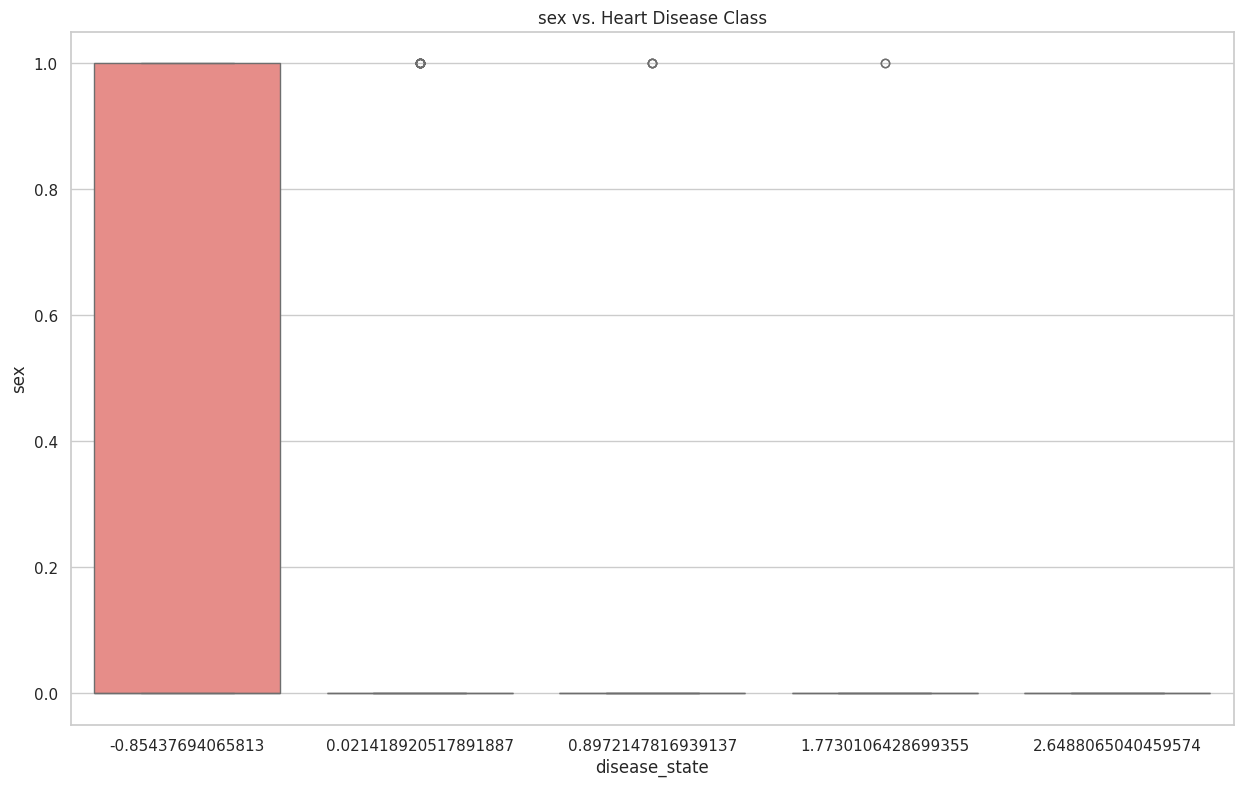

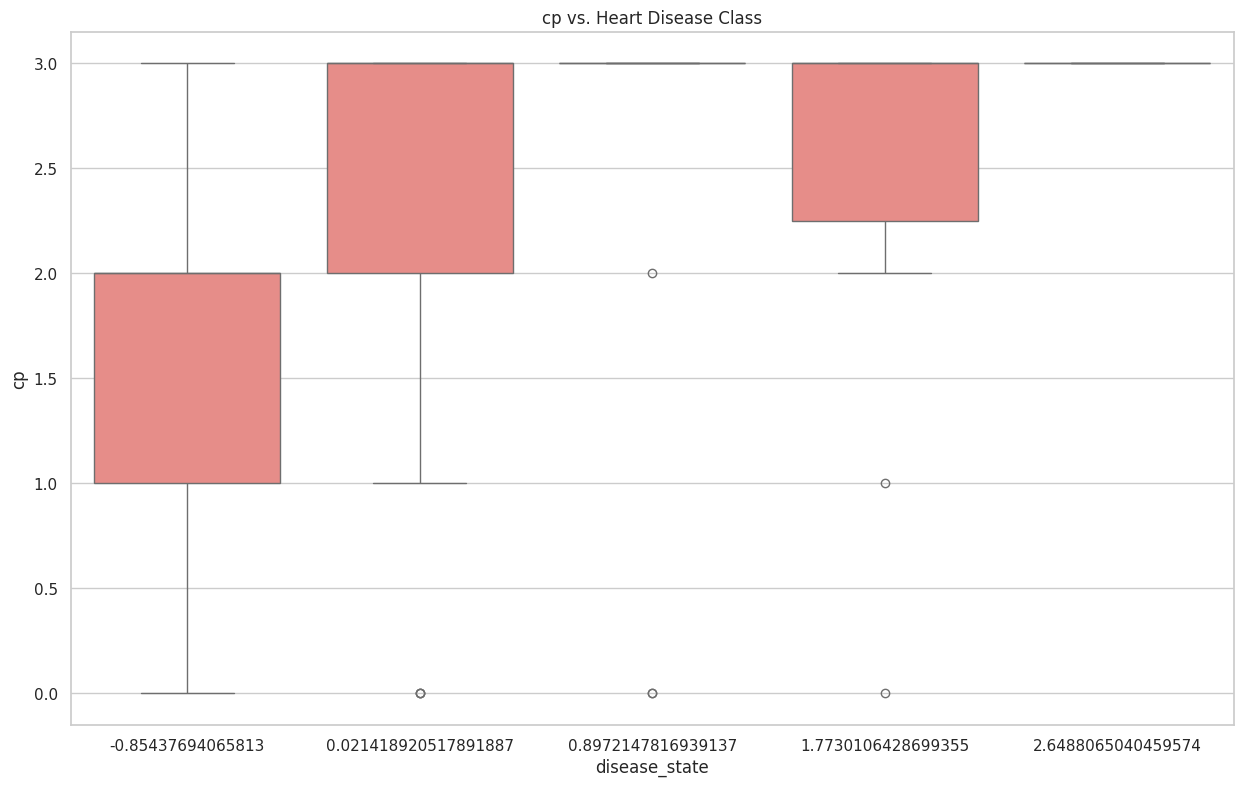

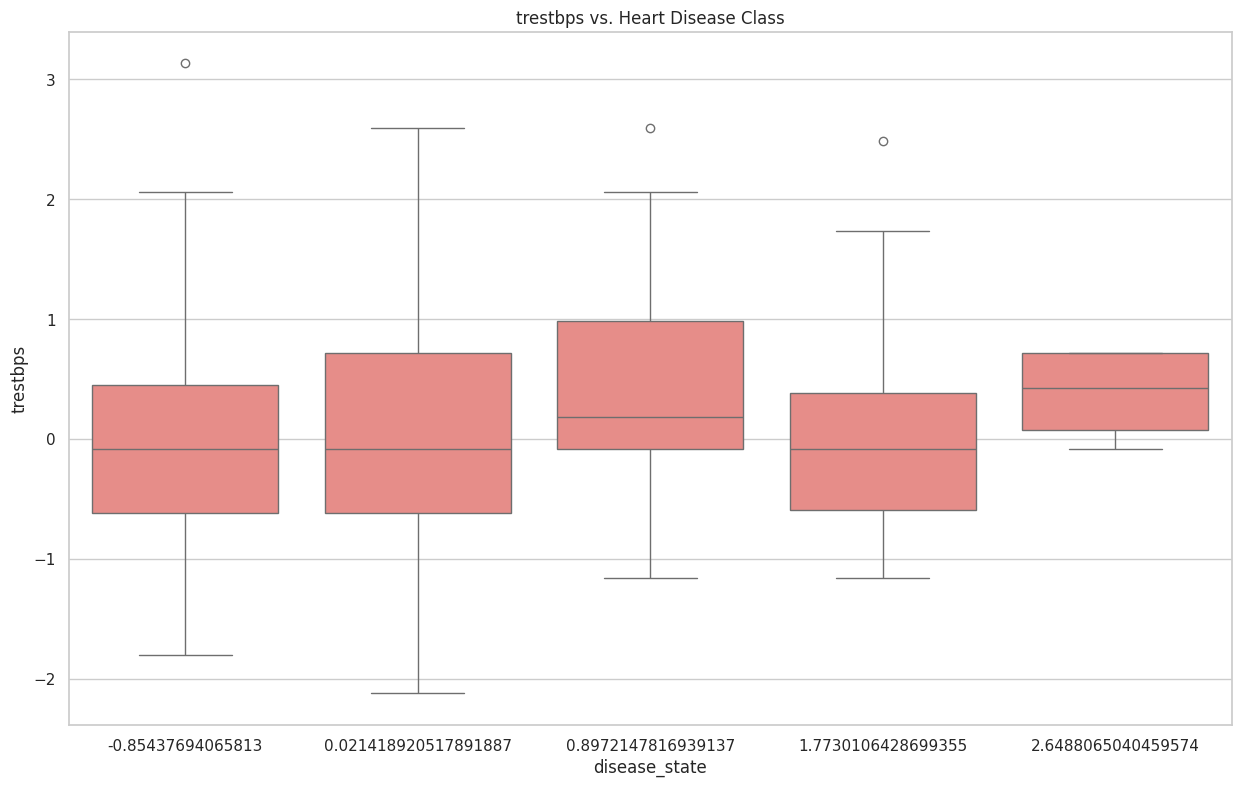

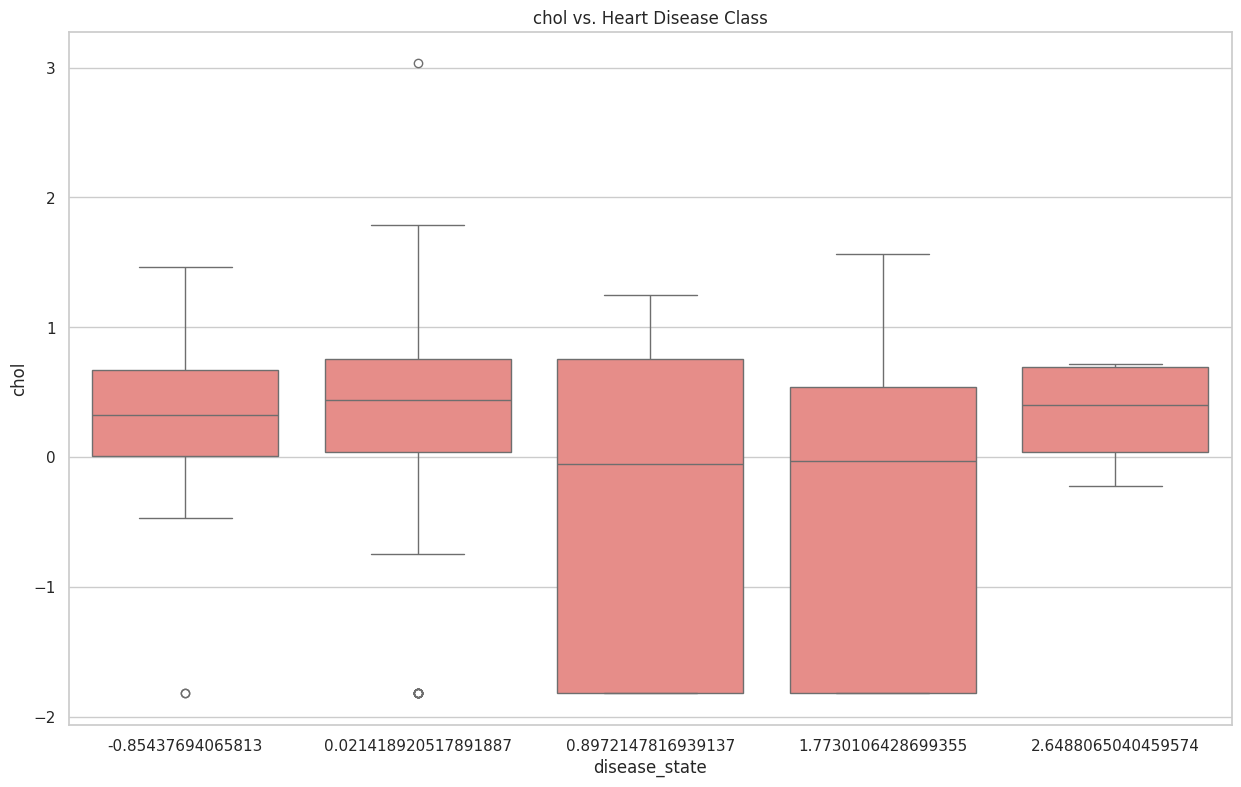

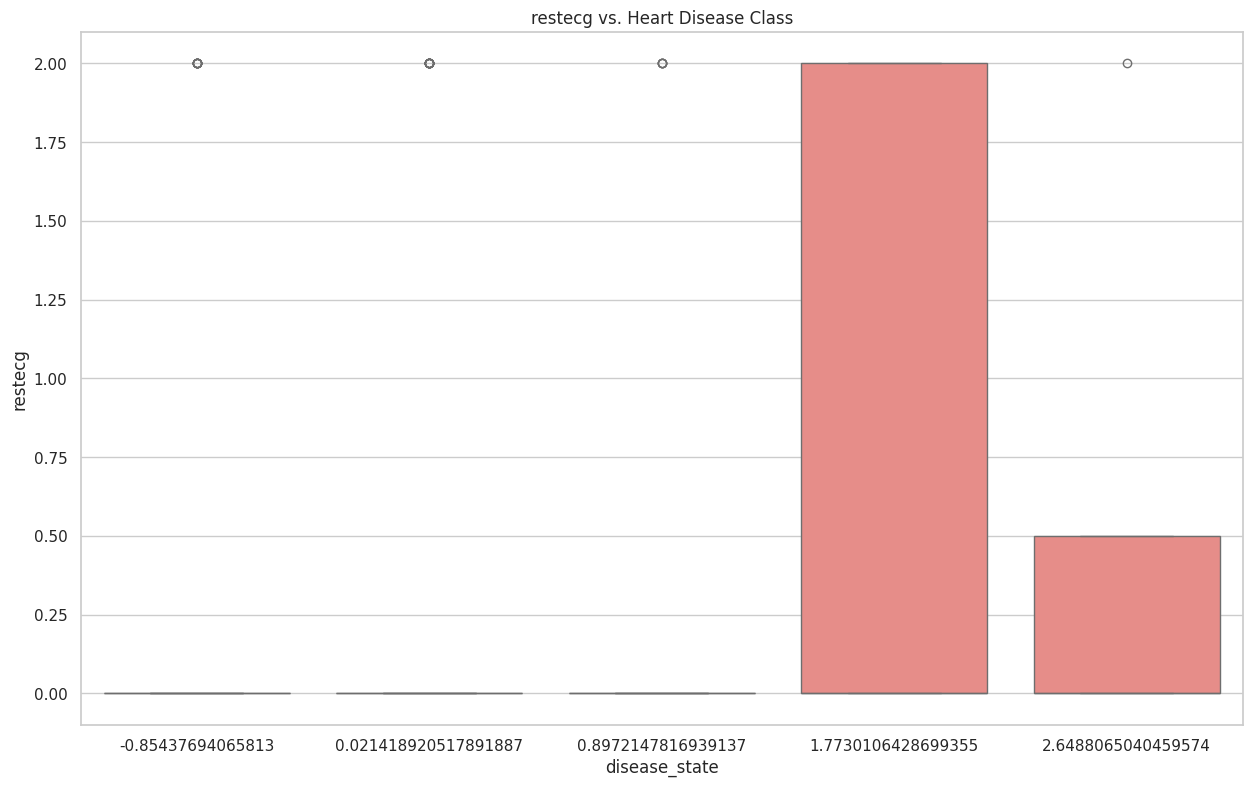

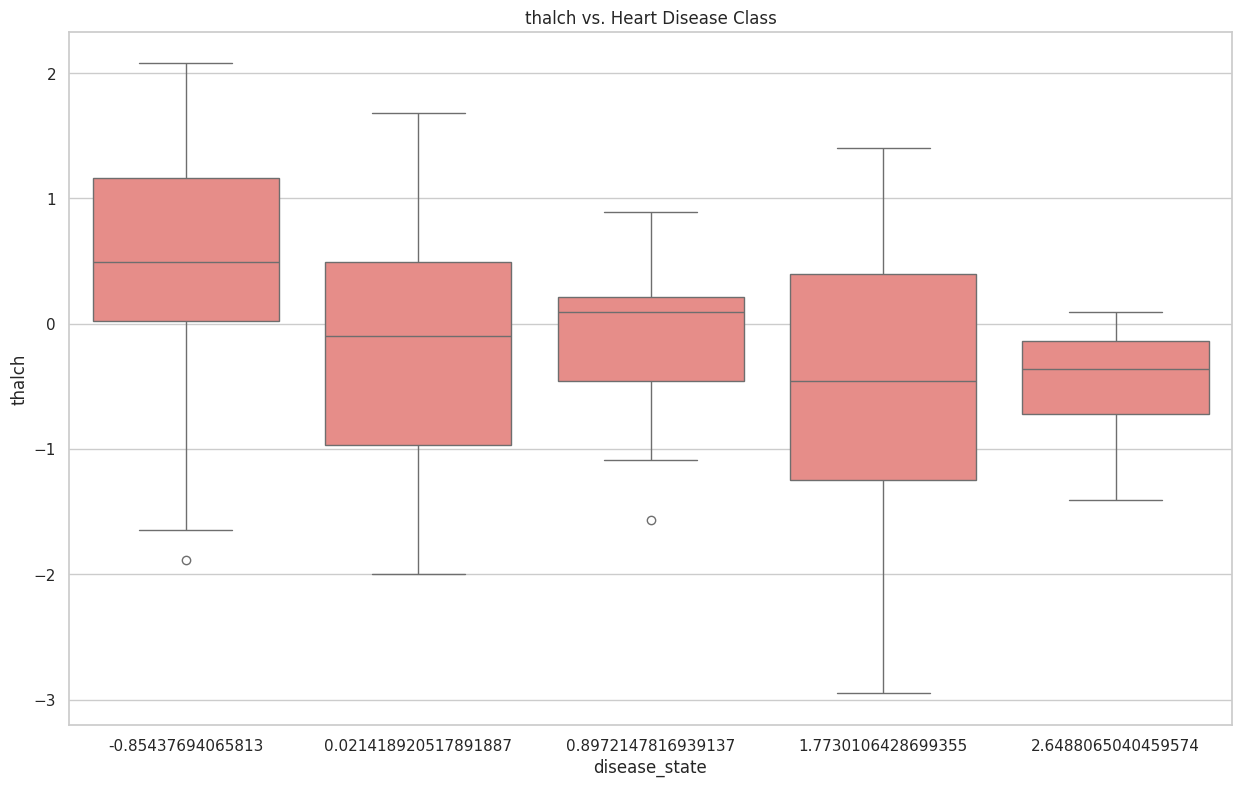

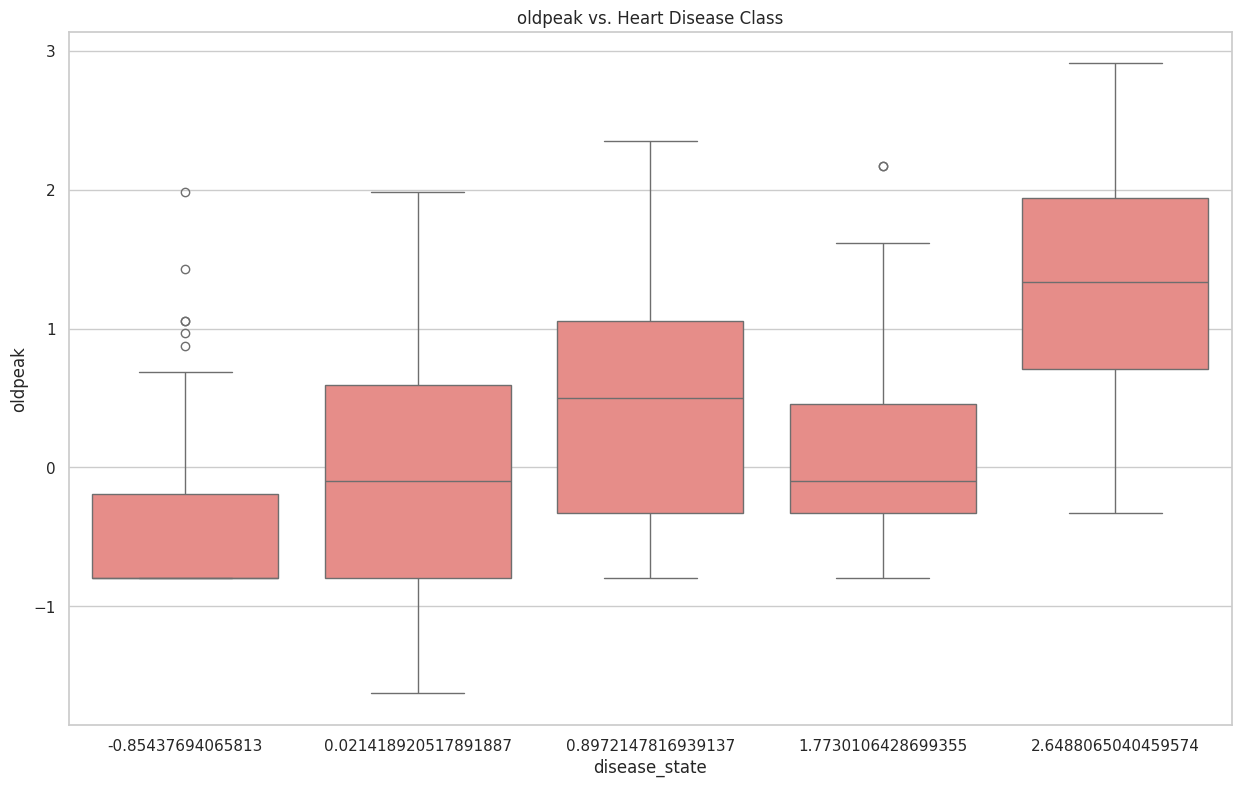

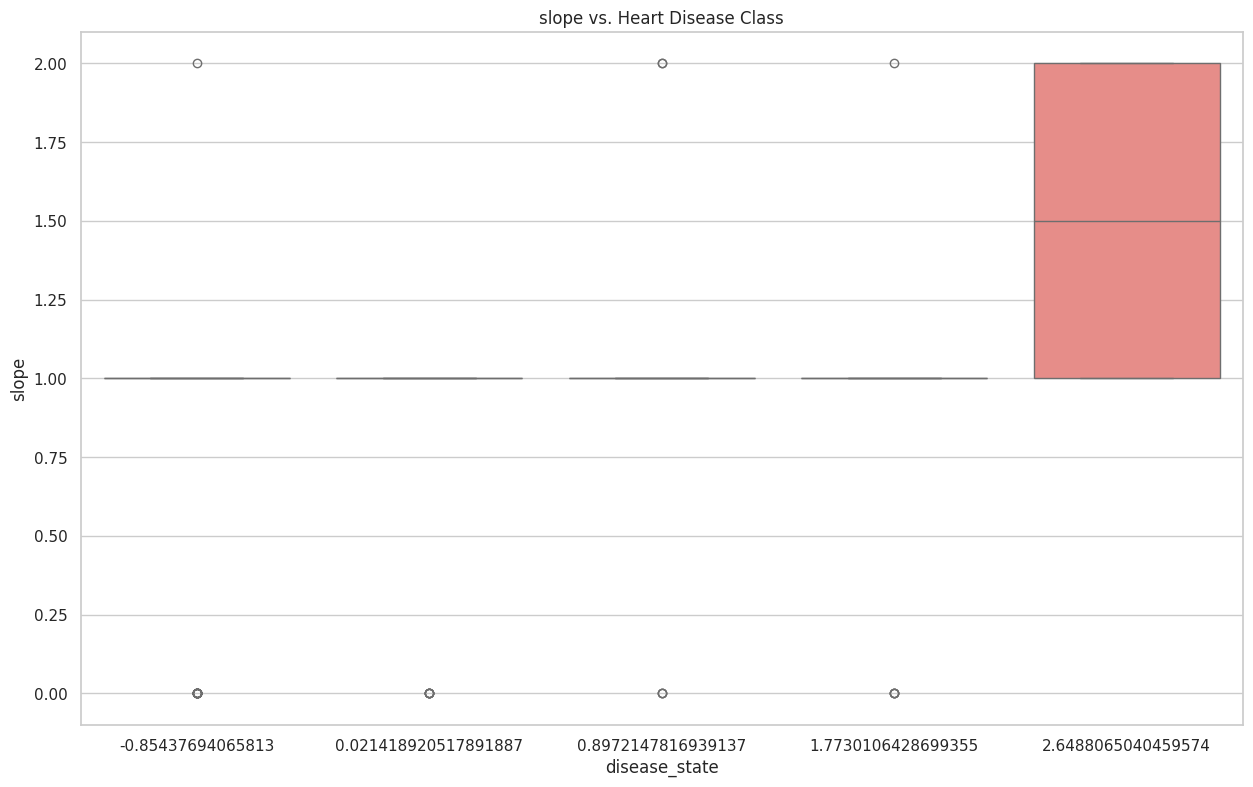

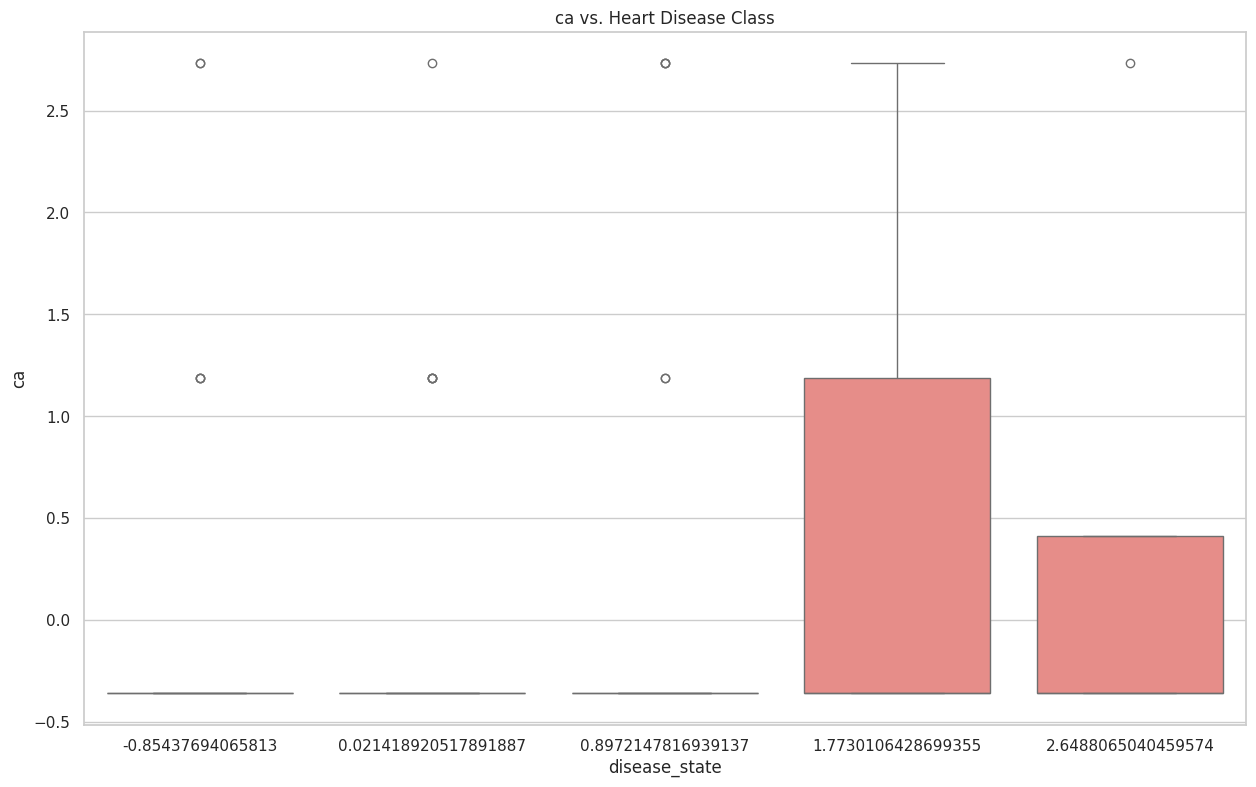

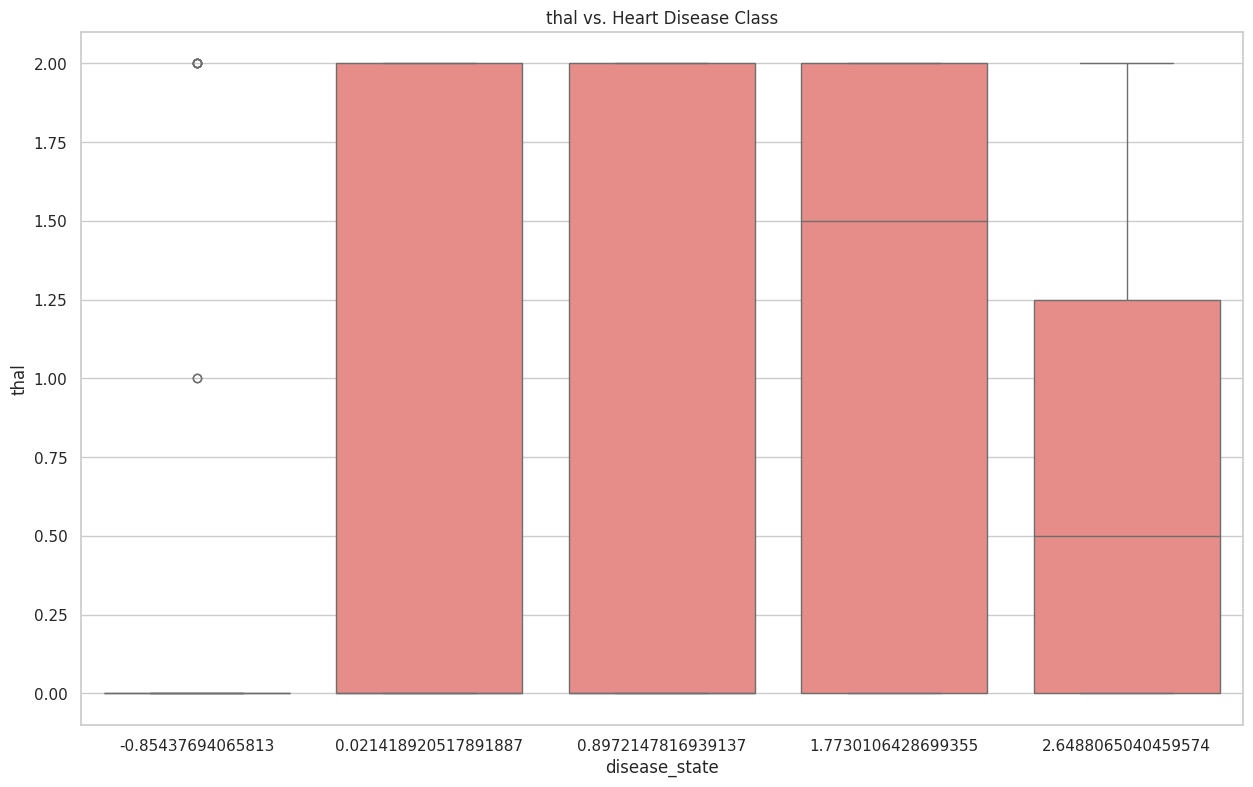

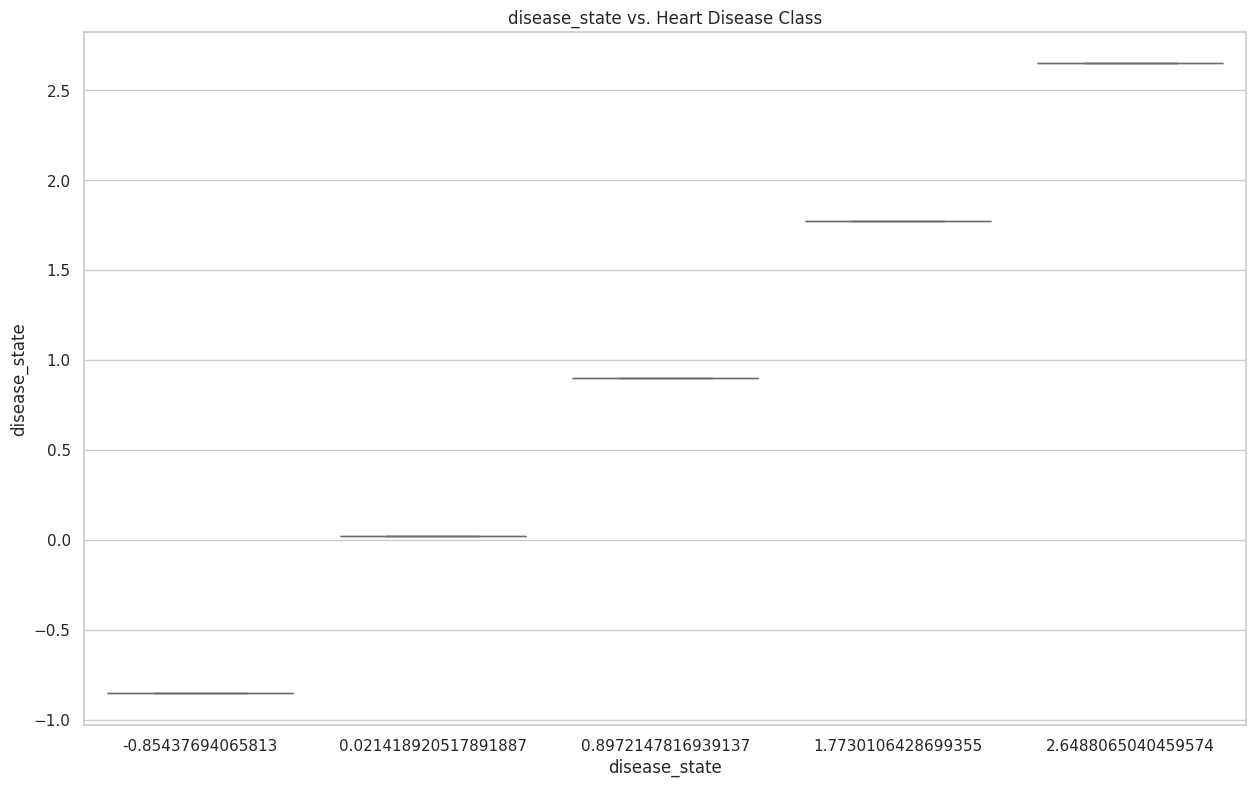

In [792]:
for feature in test_data.columns:
    plt.figure(figsize=(15, 9))
    sns.boxplot(x='disease_state', y = feature, data = test_data , color = '#f67f79')
    plt.title(f"{feature} vs. Heart Disease Class")
    plt.show()

# 4. Countplot of Categorical Columns

In [793]:
print(categorical_columns)

['sex', 'cp', 'restecg', 'slope', 'thal']


In [794]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 880 to 102
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            736 non-null    float64
 1   sex            736 non-null    int64  
 2   cp             736 non-null    int64  
 3   trestbps       736 non-null    float64
 4   chol           736 non-null    float64
 5   restecg        736 non-null    int64  
 6   thalch         736 non-null    float64
 7   oldpeak        736 non-null    float64
 8   slope          736 non-null    int64  
 9   ca             736 non-null    float64
 10  thal           736 non-null    int64  
 11  disease_state  736 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 74.8 KB


## For Train Data

/tmp/ipython-input-795-4061357750.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette=custom_palette)
/tmp/ipython-input-795-4061357750.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x=col, data=train_data, palette=custom_palette)
/tmp/ipython-input-795-4061357750.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Disease State', fontsize=7, title_fontsize=8)
/tmp/ipython-input-795-4061357750.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countp

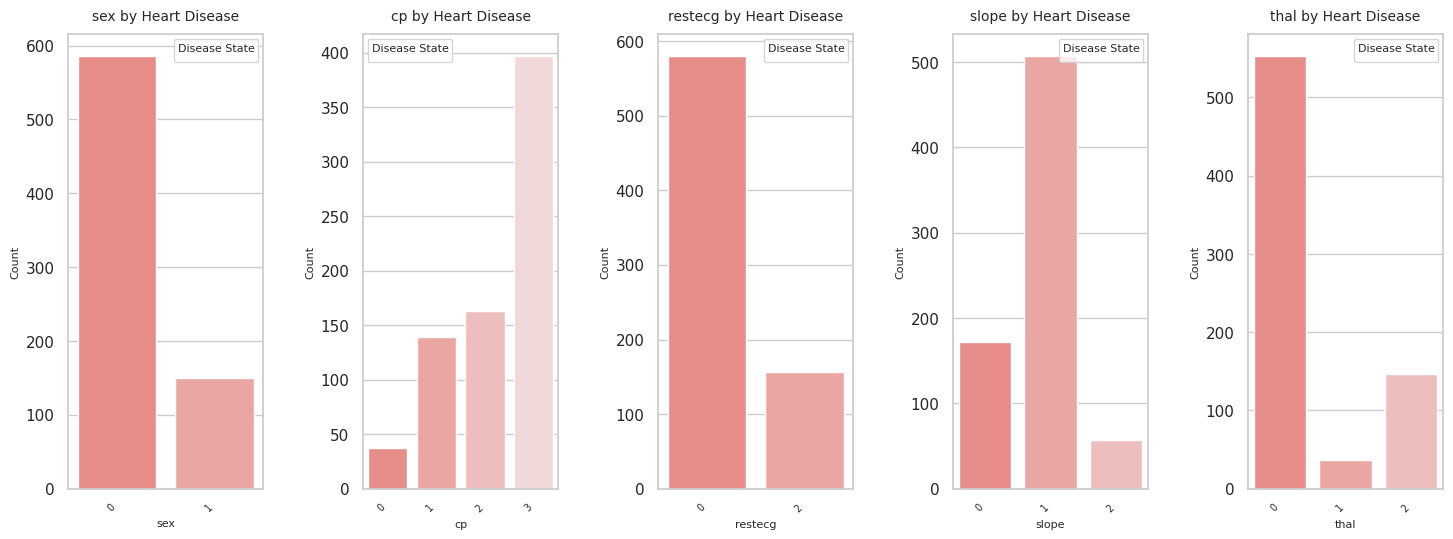

In [795]:
import matplotlib.colors as mcolors
base_color = "#f67f79"
custom_palette = sns.light_palette(base_color, n_colors=len(categorical_columns), input="hex", reverse=True)

if not categorical_columns:
    print("No valid categorical columns found in train_data. Please check column names.")
else:
    plt.figure(figsize=(15, 6))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(1, len(categorical_columns), i)
        sns.countplot(x=col, data=train_data, palette=custom_palette)
        plt.title(f"{col} by Heart Disease", fontsize=10, pad=10)
        plt.xlabel(col, fontsize=8)
        plt.ylabel('Count', fontsize=8)
        plt.xticks(rotation=45, ha='right', fontsize=7)
        plt.legend(title='Disease State', fontsize=7, title_fontsize=8)

    plt.tight_layout(pad=2.0, h_pad=2.5, w_pad=2.5)
    plt.subplots_adjust(top=0.88)
    plt.show()

## For Test Data

/tmp/ipython-input-796-2499967358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=test_data, palette=custom_palette)
/tmp/ipython-input-796-2499967358.py:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x=col, data=test_data, palette=custom_palette)
/tmp/ipython-input-796-2499967358.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Disease State', fontsize=7, title_fontsize=8)
/tmp/ipython-input-796-2499967358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x

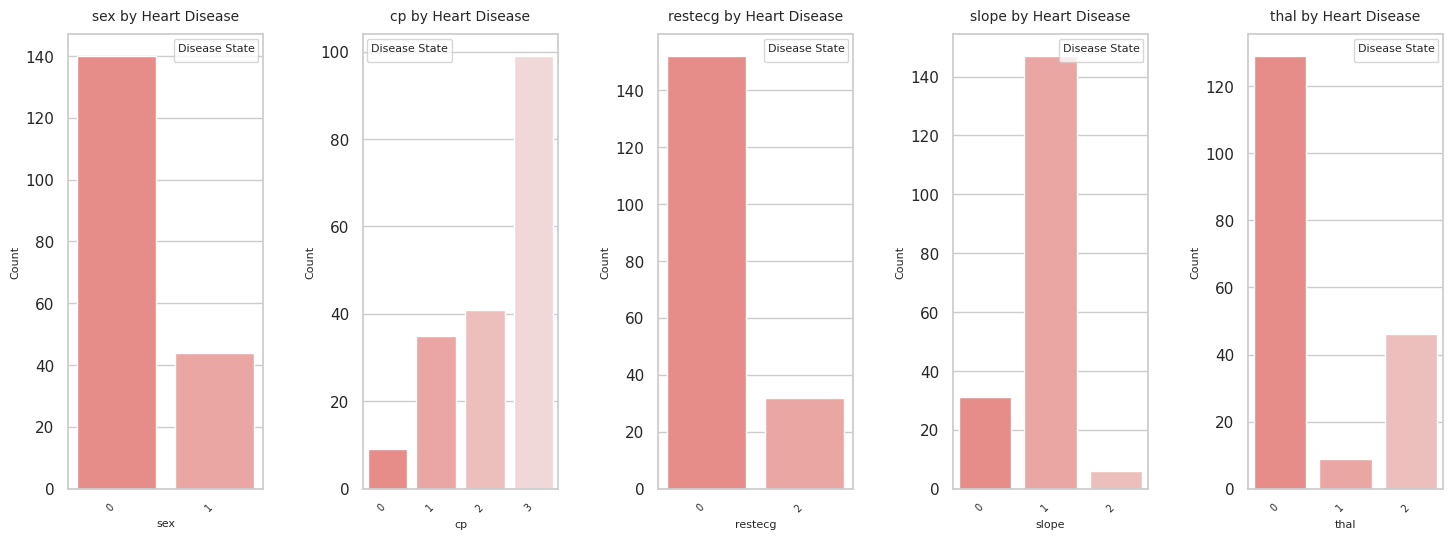

In [796]:
if not categorical_columns:
    print("No valid categorical columns found in test_data. Please check column names.")
else:
    plt.figure(figsize=(15, 6))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(1, len(categorical_columns), i)
        sns.countplot(x=col, data=test_data, palette=custom_palette)
        plt.title(f"{col} by Heart Disease", fontsize=10, pad=10)
        plt.xlabel(col, fontsize=8)
        plt.ylabel('Count', fontsize=8)
        plt.xticks(rotation=45, ha='right', fontsize=7)
        plt.legend(title='Disease State', fontsize=7, title_fontsize=8)

    plt.tight_layout(pad=2.0, h_pad=2.5, w_pad=2.5)
    plt.subplots_adjust(top=0.88)
    plt.show()

In [797]:
train_data.to_csv('cleaned_train_data.csv', index=False)

test_data.to_csv('cleaned_test_data.csv', index=False)